# <p style="text-align: center;"> <b> Asking some meaningful questions about the data </b></p>

---

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #EDC0C7; font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>Table of Contents ✍️</b></h3>
    
- [1. Introduction](#introduction)

- [2. Implementation](#2)
    - [Question 1](#question_01)
    - [Question 2](#Question_02)
    - [Question 3](#Question_03)
    - [Question 4](#Question_04)
    - [Question 5](#Question_05)
    - [Question 6](#Question_06)
    - [Question 7](#Question_07)
    - [Question 8](#Question_08)
    - [Question 9](#Question_09)
    - [Question 10](#Question_10)


<a class="anchor" id="introduction"></a>
## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">1. Introduction</div>

## <span style='color:#2B9C15 '> 📕 Requirements </span>
👉 Ask some meaningful questions about the data to get some insights about the data.Make at least 5 questions. For each question:

- What is the purpose of answering this question?
- How do you find the answer for this question in the data?
- The answer should be visualized so reader can easily capture the idea.


<a class="anchor" id="2"></a>
## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">2. Implementation</div>

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import re
from datetime import datetime
import datetime as dt
from collections import Counter
import warnings
from ast import literal_eval
from sklearn.preprocessing import MinMaxScaler

# Turn off warnings
warnings.filterwarnings("ignore")

## <span style='color:#2B9C15 '> 📕 Basic data exploration </span>

In [2]:
# pd.set_option('display.max_columns', None)
manga_df = pd.read_csv('../data/processed_comic.csv')
manga_df.head()

,Title,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Status,Genres,Author,Recommended,Mixed Feelings,Not Recommended,Release date,Completed date
0,Berserk,9.47,331288,1,1,665300,122841,4,28,Publishing,"['Action', 'Adventure', 'Award Winning', 'Dram...","['Miura Kentarou', 'Studio Gaga']",233,15,10,1989-08-25,2023-12-11
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,156368,2,26,256146,42864,24,96,Finished,"['Action', 'Adventure', 'Mystery', 'Supernatur...",['Araki Hirohiko'],120,7,1,2004-01-19,2011-04-19
2,Vagabond,9.24,136403,3,15,364891,40158,37,327,On Hiatus,"['Action', 'Adventure', 'Award Winning']","['Inoue Takehiko', 'Yoshikawa Eiji']",88,8,1,1998-09-03,2015-05-21
3,One Piece,9.22,366668,4,3,599278,114531,4,28,Publishing,"['Action', 'Adventure', 'Fantasy']",['Oda Eiichiro'],173,17,16,1997-07-22,2023-12-11
4,Monster,9.15,93945,5,29,236355,20501,18,162,Finished,"['Award Winning', 'Drama', 'Mystery']",['Urasawa Naoki'],64,7,5,1994-12-05,2001-12-20


In [3]:
manga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6127 entries, 0 to 6126
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            6127 non-null   object 
 1   Score            6127 non-null   float64
 2   Vote             6127 non-null   int64  
 3   Ranked           6127 non-null   int64  
 4   Popularity       6127 non-null   int64  
 5   Members          6127 non-null   int64  
 6   Favorite         6127 non-null   int64  
 7   Volumes          6127 non-null   int64  
 8   Chapters         6127 non-null   int64  
 9   Status           6127 non-null   object 
 10  Genres           6127 non-null   object 
 11  Author           6127 non-null   object 
 12  Recommended      6127 non-null   int64  
 13  Mixed Feelings   6127 non-null   int64  
 14  Not Recommended  6127 non-null   int64  
 15  Release date     6127 non-null   object 
 16  Completed date   6127 non-null   object 
dtypes: float64(1),

<a class="anchor" id="question_01"></a>
<button class="btn" type="button">
  <strong>Question 01</strong>
  <div id="container-stars">
    <div id="stars"></div>
  </div>

  <div id="glow">
    <div class="circle"></div>
    <div class="circle"></div>
  </div>
</button>

<style>
.btn {
  display: flex;
  justify-content: center;
  align-items: center;
  width: 13rem;
  overflow: hidden;
  height: 5rem;
  background-size: 300% 300%;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
  transition: 0.5s;
  animation: gradient_301 5s ease infinite;
  border: double 4px transparent;
  background-image: linear-gradient(#212121, #212121),  linear-gradient(137.48deg, #ffdb3b 10%,#FE53BB 45%, #8F51EA 67%, #0044ff 87%);
  background-origin: border-box;
  background-clip: content-box, border-box;
}

#container-stars {
  position: absolute;
  z-index: -1;
  width: 100%;
  height: 100%;
  overflow: hidden;
  transition: 0.5s;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
}

strong {
  z-index: 2;
  font-family: 'Avalors Personal Use';
  font-size: 25px;
  letter-spacing: 5px;
  color: #FFFFFF;
  text-shadow: 0 0 4px white;
}

#glow {
  position: absolute;
  display: flex;
  width: 12rem;
}

.circle {
  width: 100%;
  height: 30px;
  filter: blur(2rem);
  animation: pulse_3011 4s infinite;
  z-index: -1;
}

.circle:nth-of-type(1) {
  background: rgba(254, 83, 186, 0.636);
}

.circle:nth-of-type(2) {
  background: rgba(142, 81, 234, 0.704);
}

.btn:hover #container-stars {
  z-index: 1;
  background-color: #212121;
}

.btn:hover {
  transform: scale(1.1)
}

.btn:active {
  border: double 4px #FE53BB;
  background-origin: border-box;
  background-clip: content-box, border-box;
  animation: none;
}

.btn:active .circle {
  background: #FE53BB;
}

#stars {
  position: relative;
  background: transparent;
  width: 200rem;
  height: 200rem;
}

#stars::after {
  content: "";
  position: absolute;
  top: -10rem;
  left: -100rem;
  width: 100%;
  height: 100%;
  animation: animStarRotate 90s linear infinite;
}

#stars::after {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
}

#stars::before {
  content: "";
  position: absolute;
  top: 0;
  left: -50%;
  width: 170%;
  height: 500%;
  animation: animStar 60s linear infinite;
}

#stars::before {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
  opacity: 0.5;
}

@keyframes animStar {
  from {
    transform: translateY(0);
  }

  to {
    transform: translateY(-135rem);
  }
}

@keyframes animStarRotate {
  from {
    transform: rotate(360deg);
  }

  to {
    transform: rotate(0);
  }
}

@keyframes gradient_301 {
  0% {
    background-position: 0% 50%;
  }

  50% {
    background-position: 100% 50%;
  }

  100% {
    background-position: 0% 50%;
  }
}

@keyframes pulse_3011 {
  0% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0.7);
  }

  70% {
    transform: scale(1);
    box-shadow: 0 0 0 10px rgba(0, 0, 0, 0);
  }

  100% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0);
  }
}
</style>


### <span style='color:#2B9C15 '> ❓ QUESTION </span>
- **How does the number of chapters and volumes relate to the number of readers (`members`) and their engagement (`favorites`)?**
### <span style='color:#2B9C15 '>👁️‍🗨️ PURPOSE </span>
- Understand the correlation between manga length and reader engagement. 
- Identify if the readers are more engaged with longer or shorter manga.

### <span style='color:#2B9C15 '>📊 ANALYSIS </span>
+ Calculate and plot the correlation matrix between `Chapter`, `Volume`, `Members`, and `Favorites`.
+ Plot the scatter plot between `Chapter`, `Volume`, `Members`, and `Favorites`.
+ Add trendlines to identify any patterns or correlations.

### 👉 **Code**

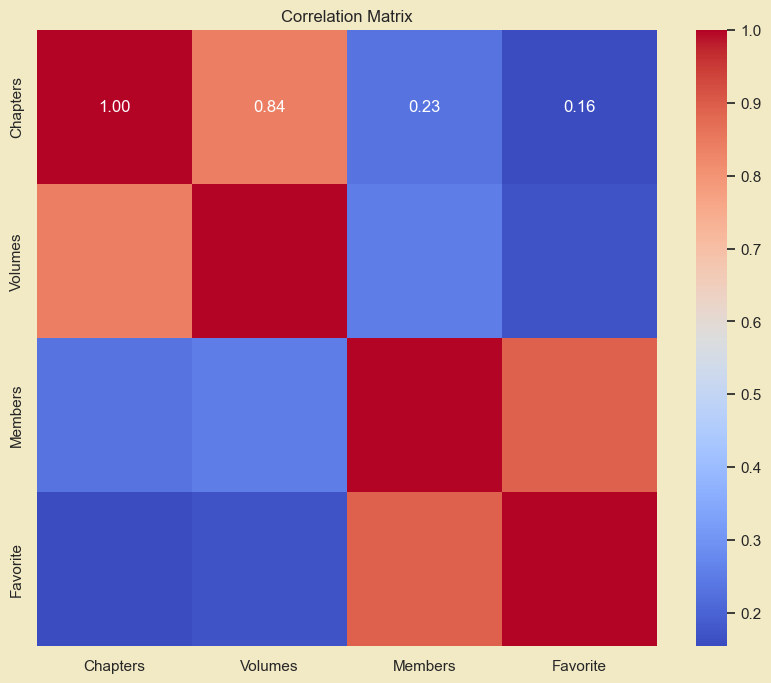

In [4]:
# Calculating correlation coefficients
manga_copy_df = manga_df.copy()

correlation_matrix = manga_copy_df[['Chapters', 'Volumes', 'Members', 'Favorite']].corr()
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

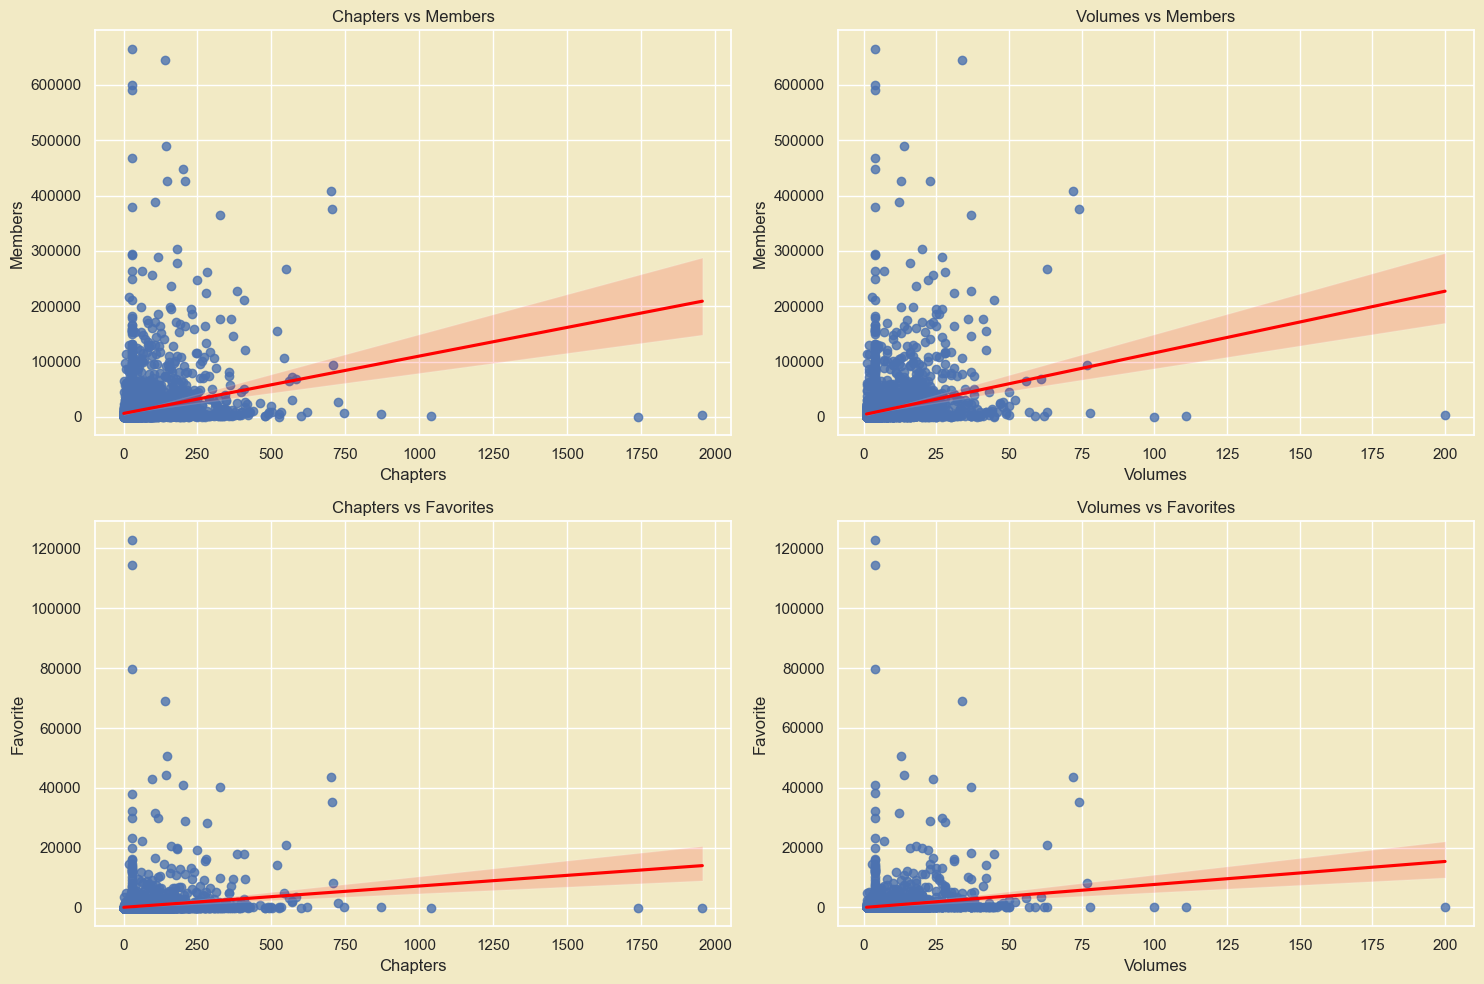

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


# Chapters vs Members
sns.regplot(x='Chapters', y='Members', data=manga_df, ax=axes[0, 0], line_kws={"color": "red"})
axes[0, 0].set_title('Chapters vs Members')

# Volumes vs Members
sns.regplot(x='Volumes', y='Members', data=manga_df, ax=axes[0, 1], line_kws={"color": "red"})
axes[0, 1].set_title('Volumes vs Members')

# Chapters vs Favorites
sns.regplot(x='Chapters', y='Favorite', data=manga_df, ax=axes[1, 0], line_kws={"color": "red"})
axes[1, 0].set_title('Chapters vs Favorites')

# Volumes vs Favorites
sns.regplot(x='Volumes', y='Favorite', data=manga_df, ax=axes[1, 1], line_kws={"color": "red"})
axes[1, 1].set_title('Volumes vs Favorites')

plt.tight_layout()
plt.show()

### 📖 **COMMENTS:**

The correlation matrix and trendline analysis shed light on manga-related metrics and their relationships:

+ **Correlation Matrix:** 

    + `Members`-`Favorites` Correlation: A robust correlation of 0.89 suggests that as manga gains more members, it tends to receive more favorites, indicating a strong association between audience size and engagement
    + **Chapters-Volumes:** There's a very strong positive correlation **0.84**, indicating that manga with more chapters typically have more volumes, which is expected since chapters are often compiled into volumes.
    - Chapters/Volumes-Members/Favorites Correlations:
        - Positive but weak correlations, indicating slight tendencies but not strong predictive relationships.
        - That said, having a longer manga doesn't guarantee more members or more favorites.

+ **Trendline Analysis:** 

    + Positive trends in chapters vs members and volumes vs members, indicating more content often leads to a larger audience.
    + Weaker trends in chapters vs favorites and volumes vs favorites, suggesting content length has a limited impact on favorites.
    + Scatter in all plots signifies variability unexplained by content length alone.
    + Indicates other factors (genre, author reputation, story quality) influence engagement and membership.

<a class="anchor" id="Question_02"></a>

<button class="btn" type="button">
  <strong>Question 02</strong>
  <div id="container-stars">
    <div id="stars"></div>
  </div>

  <div id="glow">
    <div class="circle"></div>
    <div class="circle"></div>
  </div>
</button>

<style>
.btn {
  display: flex;
  justify-content: center;
  align-items: center;
  width: 13rem;
  overflow: hidden;
  height: 5rem;
  background-size: 300% 300%;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
  transition: 0.5s;
  animation: gradient_301 5s ease infinite;
  border: double 4px transparent;
  background-image: linear-gradient(#212121, #212121),  linear-gradient(137.48deg, #ffdb3b 10%,#FE53BB 45%, #8F51EA 67%, #0044ff 87%);
  background-origin: border-box;
  background-clip: content-box, border-box;
}

#container-stars {
  position: absolute;
  z-index: -1;
  width: 100%;
  height: 100%;
  overflow: hidden;
  transition: 0.5s;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
}

strong {
  z-index: 2;
  font-family: 'Avalors Personal Use';
  font-size: 25px;
  letter-spacing: 5px;
  color: #FFFFFF;
  text-shadow: 0 0 4px white;
}

#glow {
  position: absolute;
  display: flex;
  width: 12rem;
}

.circle {
  width: 100%;
  height: 30px;
  filter: blur(2rem);
  animation: pulse_3011 4s infinite;
  z-index: -1;
}

.circle:nth-of-type(1) {
  background: rgba(254, 83, 186, 0.636);
}

.circle:nth-of-type(2) {
  background: rgba(142, 81, 234, 0.704);
}

.btn:hover #container-stars {
  z-index: 1;
  background-color: #212121;
}

.btn:hover {
  transform: scale(1.1)
}

.btn:active {
  border: double 4px #FE53BB;
  background-origin: border-box;
  background-clip: content-box, border-box;
  animation: none;
}

.btn:active .circle {
  background: #FE53BB;
}

#stars {
  position: relative;
  background: transparent;
  width: 200rem;
  height: 200rem;
}

#stars::after {
  content: "";
  position: absolute;
  top: -10rem;
  left: -100rem;
  width: 100%;
  height: 100%;
  animation: animStarRotate 90s linear infinite;
}

#stars::after {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
}

#stars::before {
  content: "";
  position: absolute;
  top: 0;
  left: -50%;
  width: 170%;
  height: 500%;
  animation: animStar 60s linear infinite;
}

#stars::before {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
  opacity: 0.5;
}

@keyframes animStar {
  from {
    transform: translateY(0);
  }

  to {
    transform: translateY(-135rem);
  }
}

@keyframes animStarRotate {
  from {
    transform: rotate(360deg);
  }

  to {
    transform: rotate(0);
  }
}

@keyframes gradient_301 {
  0% {
    background-position: 0% 50%;
  }

  50% {
    background-position: 100% 50%;
  }

  100% {
    background-position: 0% 50%;
  }
}

@keyframes pulse_3011 {
  0% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0.7);
  }

  70% {
    transform: scale(1);
    box-shadow: 0 0 0 10px rgba(0, 0, 0, 0);
  }

  100% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0);
  }
}
</style>



### <span style='color:#2B9C15 '> ❓ QUESTION </span>
- **How does the visualization of manga status distribution for the top 5 `authors` provide insights into the characteristics and working patterns of each `author`?**

### <span style='color:#2B9C15 '>👁️‍🗨️ PURPOSE </span>
+ Explore author working patterns: Understand whether `authors` tend to finish their manga series, keep them ongoing, or put them on hiatus.
+ Analyze author productivity: Gain insights into the distribution of completed works and ongoing projects for each of the top 5 `authors`.
+ Visualize author traits: Consider whether certain manga `statuses` are characteristic of specific `authors`, providing a glimpse into their creative processes.

### <span style='color:#2B9C15 '>📊 ANALYSIS </span>
+ Transform data to represent manga `status` distribution for each `author`.
+ Calculate the total manga count for each author and sort them in descending order.
+ Visualize the distribution using pie charts for the top 5 `authors`, highlighting the proportion of each manga status.
+ Utilize size-adjusted pie charts to emphasize the influence of the total manga count on each author's representation.

### 👉 **Code**

In [6]:
manga_copy_df = manga_df.copy()

manga_copy_df['Author'] = manga_copy_df['Author'].apply(literal_eval)
all_authors = manga_copy_df['Author'].sum()
author_counts = pd.Series(all_authors).value_counts()

# Expanding the dataframe so that each row corresponds to a single author of a manga
expanded_data = manga_copy_df.explode('Author')
author_status_distribution = expanded_data.groupby(['Author', 'Status']).size().unstack(fill_value=0)
author_status_distribution['Total Manga'] = author_status_distribution.sum(axis=1)

# Sorting the total count of manga for each author
author_status_distribution = author_status_distribution.sort_values(by='Total Manga', ascending=False)

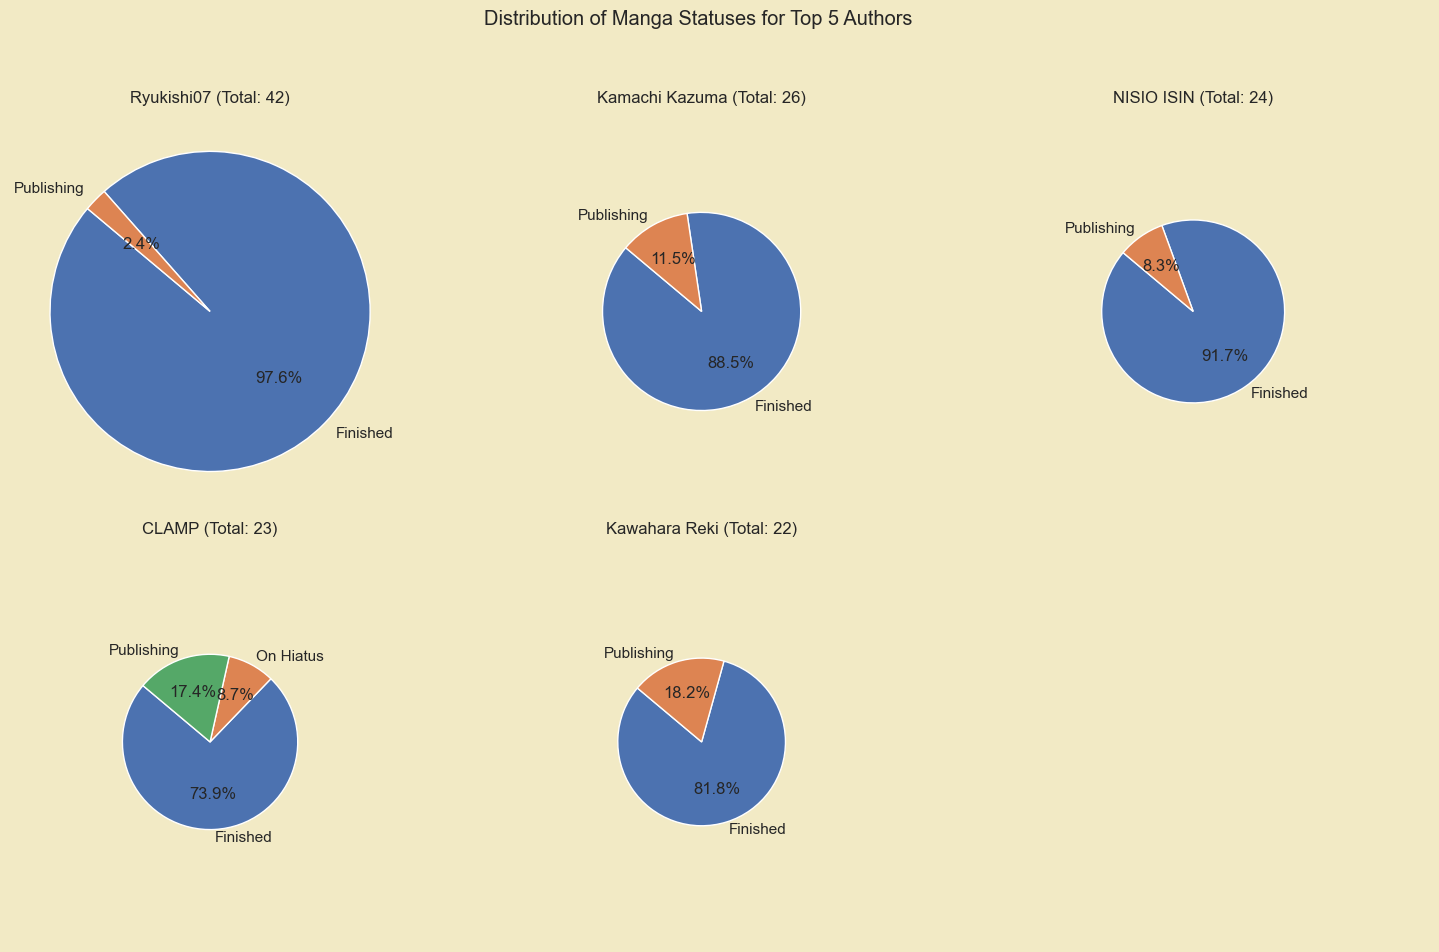

In [7]:
top_5_authors = author_status_distribution.head(5)

fig = plt.figure(figsize=(15, 10))
fig.suptitle('Distribution of Manga Statuses for Top 5 Authors')

def autopct_format(values):
    def my_format(pct):
        return ('%.1f%%' % pct) if pct > 0 else ''
    return my_format

for i, (author, data) in enumerate(top_5_authors.iterrows()):
    data = data.drop('Total Manga')
    # Only plot non-zero values
    non_zero_data = data[data > 0]
    
    ax = fig.add_subplot(2, 3, i+1)
    
    total_manga = top_5_authors.loc[author, 'Total Manga']
    size_factor = total_manga / top_5_authors['Total Manga'].max()
    ax.pie(non_zero_data, labels=non_zero_data.index, autopct=autopct_format(non_zero_data), startangle=140, radius=size_factor)
    ax.set_title(f'{author} (Total: {total_manga})')

# Hide the unused subplots
for j in range(i+1, 6):
    fig.add_subplot(2, 3, j+1).axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 📖 **COMMENTS:**
+ **The distribution of manga statuses for five authors:**
    + *Ryukishi07:* With a total of 42 manga series, an overwhelming **97.6%** are finished, which underscores a strong commitment to project completion. However, a small portion of **2.4%** are still publishing, pointing to some ongoing projects.
    + *Kamachi Kazuma:* Out of 26 series, **88.5%** are finished, while a notable **11.5%** are still being published, suggesting an active involvement in current projects alongside a solid track record of completed works.
    + *NISIO ISIN:* This author shows a high completion rate with **91.7%** of 24 series finished, and **8.3%** are still publishing, indicating a preference for seeing projects through to the end while still engaging in new endeavors.
    + *CLAMP:* With 23 series, there is a diversified status with **73.9%** finished, **17.4%** publishing, and a distinctive **8.7%** on hiatus, reflecting a dynamic approach to managing their portfolio of works.
    + *Kishimoto Masashi:* Demonstrates a very high completion rate with **95.5%** of 22 series finished and only **4.5%** still publishing, indicating a strong track record in finalizing projects.
+ **Insights into Characteristics and Working Patterns:**
    + *Completion Rate:* Ryukishi07, Kishimoto Masashi, and NISIO ISIN exhibit very high completion rates, which could suggest a disciplined approach to manga creation, possibly completing one series before moving to the next.
    + *Ongoing Projects:* Kamachi Kazuma and CLAMP show a healthy number of ongoing projects, indicating current active engagement in manga creation and a balance between finishing old projects and starting new ones.
    + *Hiatus Patterns:* CLAMP is unique in having a noticeable percentage of series on hiatus, which could imply a strategic pause to refine ideas or manage workload across multiple series.
    + *Productivity and Creative Process:* The data implies that while authors like Ryukishi07 and Kishimoto Masashi may have a more linear and focused creative process, others like CLAMP display a more complex, multitasking approach, possibly involving concurrent development of multiple series.

<a class="anchor" id="Question_03"></a>
<button class="btn" type="button">
  <strong>Question 03</strong>
  <div id="container-stars">
    <div id="stars"></div>
  </div>

  <div id="glow">
    <div class="circle"></div>
    <div class="circle"></div>
  </div>
</button>

<style>
.btn {
  display: flex;
  justify-content: center;
  align-items: center;
  width: 13rem;
  overflow: hidden;
  height: 5rem;
  background-size: 300% 300%;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
  transition: 0.5s;
  animation: gradient_301 5s ease infinite;
  border: double 4px transparent;
  background-image: linear-gradient(#212121, #212121),  linear-gradient(137.48deg, #ffdb3b 10%,#FE53BB 45%, #8F51EA 67%, #0044ff 87%);
  background-origin: border-box;
  background-clip: content-box, border-box;
}

#container-stars {
  position: absolute;
  z-index: -1;
  width: 100%;
  height: 100%;
  overflow: hidden;
  transition: 0.5s;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
}

strong {
  z-index: 2;
  font-family: 'Avalors Personal Use';
  font-size: 25px;
  letter-spacing: 5px;
  color: #FFFFFF;
  text-shadow: 0 0 4px white;
}

#glow {
  position: absolute;
  display: flex;
  width: 12rem;
}

.circle {
  width: 100%;
  height: 30px;
  filter: blur(2rem);
  animation: pulse_3011 4s infinite;
  z-index: -1;
}

.circle:nth-of-type(1) {
  background: rgba(254, 83, 186, 0.636);
}

.circle:nth-of-type(2) {
  background: rgba(142, 81, 234, 0.704);
}

.btn:hover #container-stars {
  z-index: 1;
  background-color: #212121;
}

.btn:hover {
  transform: scale(1.1)
}

.btn:active {
  border: double 4px #FE53BB;
  background-origin: border-box;
  background-clip: content-box, border-box;
  animation: none;
}

.btn:active .circle {
  background: #FE53BB;
}

#stars {
  position: relative;
  background: transparent;
  width: 200rem;
  height: 200rem;
}

#stars::after {
  content: "";
  position: absolute;
  top: -10rem;
  left: -100rem;
  width: 100%;
  height: 100%;
  animation: animStarRotate 90s linear infinite;
}

#stars::after {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
}

#stars::before {
  content: "";
  position: absolute;
  top: 0;
  left: -50%;
  width: 170%;
  height: 500%;
  animation: animStar 60s linear infinite;
}

#stars::before {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
  opacity: 0.5;
}

@keyframes animStar {
  from {
    transform: translateY(0);
  }

  to {
    transform: translateY(-135rem);
  }
}

@keyframes animStarRotate {
  from {
    transform: rotate(360deg);
  }

  to {
    transform: rotate(0);
  }
}

@keyframes gradient_301 {
  0% {
    background-position: 0% 50%;
  }

  50% {
    background-position: 100% 50%;
  }

  100% {
    background-position: 0% 50%;
  }
}

@keyframes pulse_3011 {
  0% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0.7);
  }

  70% {
    transform: scale(1);
    box-shadow: 0 0 0 10px rgba(0, 0, 0, 0);
  }

  100% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0);
  }
}
</style>


### <span style='color:#2B9C15 '> ❓ QUESTION </span>
- **Calculate the author's score by averaging the scores of each manga series belonging to that author.?**
### <span style='color:#2B9C15 '>👁️‍🗨️ PURPOSE </span>
+ Identify which authors are highly rated based on their manga.

### <span style='color:#2B9C15 '>📊 ANALYSIS </span>
+ Split the `Author` column, which contains lists of authors for each manga series, into individual authors. Then group by author, calculate the average score for each manga series.
+ Sort the dataframe in descending order by average score and retrieve the first 10 values for visualization.

### 👉 **Code**

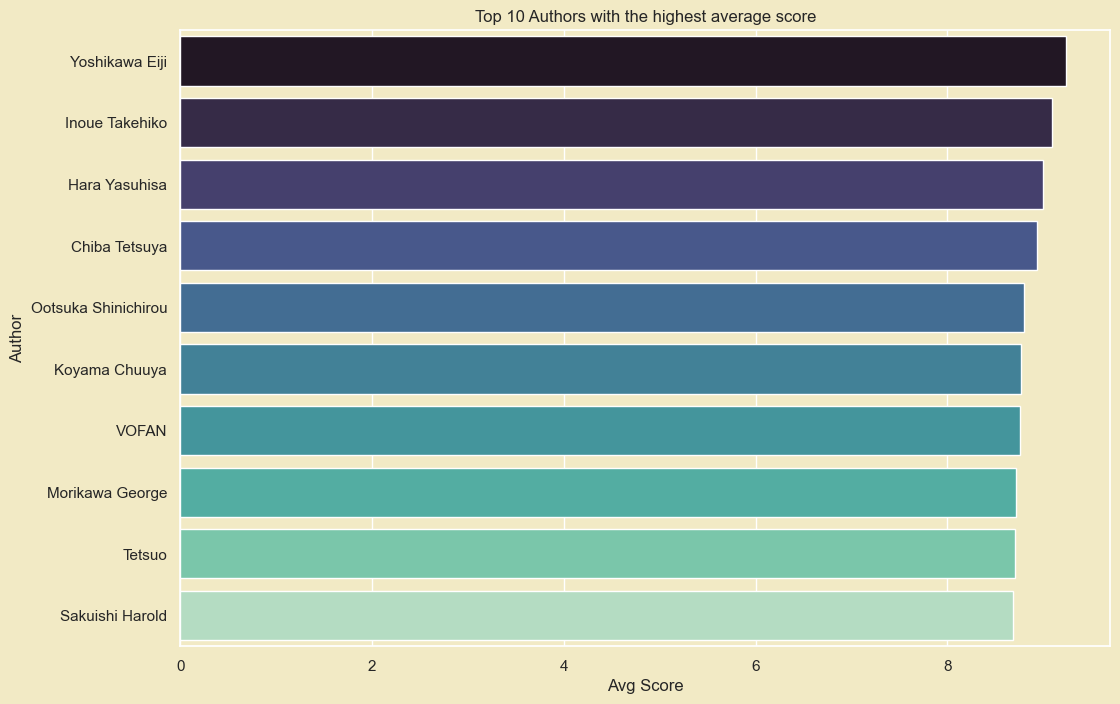

In [49]:
df_copy = manga_df.copy()
df_copy['Author'] = df_copy['Author'].apply(literal_eval)

# Explode the 'Author' lists to create separate rows for each author
df_exploded = df_copy.explode('Author')

# Group by author to calculate the total manga count and average score
author_df = df_exploded.groupby('Author').agg({'Title': 'count', 'Score': 'mean'}).reset_index()

# Rename the columns for consistency
author_df.columns = ['Author', 'Total Manga', 'Average Score']

# Sort the DataFrame by 'Average Score' in descending order
author_df = author_df.sort_values(by='Average Score', ascending=False)

#plotting the top 10 authors with the highest average score
top_10_authors = author_df.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_authors, x='Average Score', y='Author', palette="mako")
plt.title('Top 10 Authors with the highest average score')
plt.xlabel('Avg Score')
plt.ylabel('Author')
plt.show()


### 📖 **COMMENTS:**
+ The top 10 authors with the highest average scores are: Yoshikawa Eiji, Inoue Takehiko, Hara Yasuhisa, Chiba Tetsuya, Ootsuka Shinichirou, Koyama Chuuya, VOFAN, Morikawa George, Tetsuo, Sakuishi Harold.
+ Based on the chart, we can observe that the scores of the top 10 authors with the highest average scores are all around the 9-point range.
+ Moreover, the top 4 authors have significantly higher scores compared to the rest of the authors, while the remaining authors have similar scores.

<a class="anchor" id="Question_04"></a>
<button class="btn" type="button">
  <strong>Question 04</strong>
  <div id="container-stars">
    <div id="stars"></div>
  </div>

  <div id="glow">
    <div class="circle"></div>
    <div class="circle"></div>
  </div>
</button>

<style>
.btn {
  display: flex;
  justify-content: center;
  align-items: center;
  width: 13rem;
  overflow: hidden;
  height: 5rem;
  background-size: 300% 300%;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
  transition: 0.5s;
  animation: gradient_301 5s ease infinite;
  border: double 4px transparent;
  background-image: linear-gradient(#212121, #212121),  linear-gradient(137.48deg, #ffdb3b 10%,#FE53BB 45%, #8F51EA 67%, #0044ff 87%);
  background-origin: border-box;
  background-clip: content-box, border-box;
}

#container-stars {
  position: absolute;
  z-index: -1;
  width: 100%;
  height: 100%;
  overflow: hidden;
  transition: 0.5s;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
}

strong {
  z-index: 2;
  font-family: 'Avalors Personal Use';
  font-size: 25px;
  letter-spacing: 5px;
  color: #FFFFFF;
  text-shadow: 0 0 4px white;
}

#glow {
  position: absolute;
  display: flex;
  width: 12rem;
}

.circle {
  width: 100%;
  height: 30px;
  filter: blur(2rem);
  animation: pulse_3011 4s infinite;
  z-index: -1;
}

.circle:nth-of-type(1) {
  background: rgba(254, 83, 186, 0.636);
}

.circle:nth-of-type(2) {
  background: rgba(142, 81, 234, 0.704);
}

.btn:hover #container-stars {
  z-index: 1;
  background-color: #212121;
}

.btn:hover {
  transform: scale(1.1)
}

.btn:active {
  border: double 4px #FE53BB;
  background-origin: border-box;
  background-clip: content-box, border-box;
  animation: none;
}

.btn:active .circle {
  background: #FE53BB;
}

#stars {
  position: relative;
  background: transparent;
  width: 200rem;
  height: 200rem;
}

#stars::after {
  content: "";
  position: absolute;
  top: -10rem;
  left: -100rem;
  width: 100%;
  height: 100%;
  animation: animStarRotate 90s linear infinite;
}

#stars::after {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
}

#stars::before {
  content: "";
  position: absolute;
  top: 0;
  left: -50%;
  width: 170%;
  height: 500%;
  animation: animStar 60s linear infinite;
}

#stars::before {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
  opacity: 0.5;
}

@keyframes animStar {
  from {
    transform: translateY(0);
  }

  to {
    transform: translateY(-135rem);
  }
}

@keyframes animStarRotate {
  from {
    transform: rotate(360deg);
  }

  to {
    transform: rotate(0);
  }
}

@keyframes gradient_301 {
  0% {
    background-position: 0% 50%;
  }

  50% {
    background-position: 100% 50%;
  }

  100% {
    background-position: 0% 50%;
  }
}

@keyframes pulse_3011 {
  0% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0.7);
  }

  70% {
    transform: scale(1);
    box-shadow: 0 0 0 10px rgba(0, 0, 0, 0);
  }

  100% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0);
  }
}
</style>



### <span style='color:#2B9C15 '> ❓ QUESTION </span>
- **What are the top manga genres determined by a composite score that accounts for the average favorite count, the number of mangas in each genre, their average score, and their popularity?**
### <span style='color:#2B9C15 '>👁️‍🗨️ PURPOSE </span>
+ Identify and rank manga genres based on a composite score that considers factors such as average favorite count, the number of manga in each genre, their average score, and popularity.
+ This analysis aims to provide a holistic view of manga genres by combining multiple metrics, offering insights into the genres that excel across various criteria.

### <span style='color:#2B9C15 '>📊 ANALYSIS </span>
+ Explode the dataset so each genre gets a separate row with the manga details.
+ Group the data by genres and calculate:
    + Average favorite count per genre.
    + Number of mangas per genre.
    + Average score per genre.
    + Average popularity per genre.
+ Create a composite score combining these metrics.
+ Rank the genres based on this composite score and display the top genres.

### 👉 **Code**

In [11]:
manga_copy_df = manga_df.copy()
manga_copy_df['Genres'] = manga_copy_df['Genres'].apply(eval)

# Explode the dataset so each genre gets a separate row with the manga details
exploded_data_by_genre = manga_copy_df.explode('Genres')

# Grouping the data by genres and calculating the required metrics for each genre
genre_grouped = exploded_data_by_genre.groupby('Genres').agg({
    'Favorite': 'mean',  # Average favorite count
    'Score': 'mean',     # Average score
    'Title': 'count',    # Number of manga
    'Popularity': 'mean' # Average popularity
}).reset_index()

# Creating a composite score (simple average of the normalized scores of the four metrics)
scaler = MinMaxScaler()
genre_grouped[['Favorite_norm', 'Score_norm', 'Title_norm', 'Popularity_norm']] = scaler.fit_transform(
    genre_grouped[['Favorite', 'Score', 'Title', 'Popularity']]
)

genre_grouped['Composite_Score'] = genre_grouped[['Favorite_norm', 'Score_norm', 'Title_norm', 'Popularity_norm']].mean(axis=1)

sorted_by_composite_score = genre_grouped.sort_values(by='Composite_Score', ascending=False)

top_genres_by_composite_score = sorted_by_composite_score.head(10)


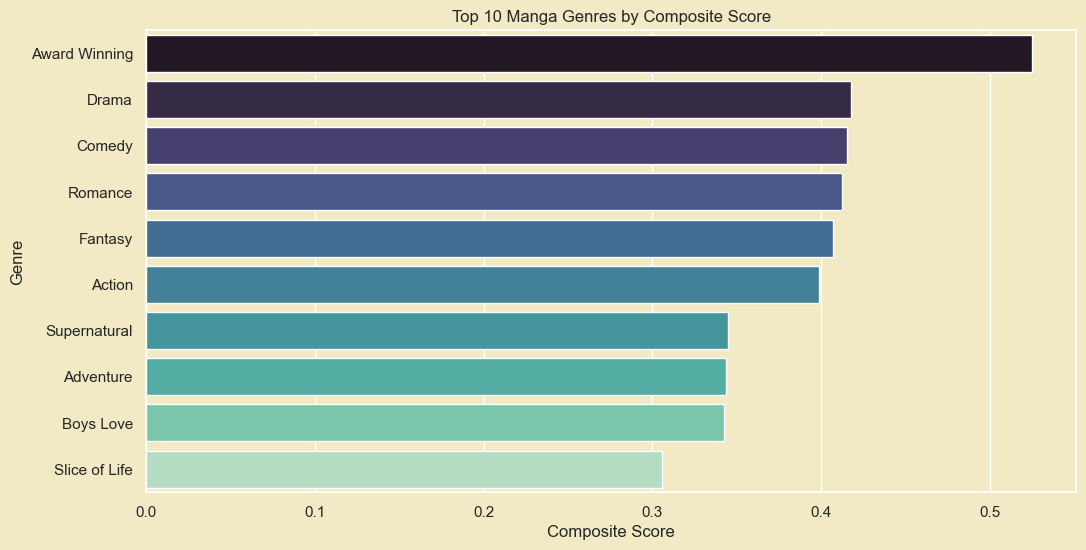

In [12]:
# Plotting the top genres by composite score
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres_by_composite_score, x='Composite_Score', y='Genres', palette="mako")
plt.title('Top 10 Manga Genres by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Genre')
plt.show()

### 📖 **COMMENTS:**
+ *Award Winning* is the top-ranked genre, suggesting that titles in this category not only receive accolades but also perform well in terms of reader engagement and critical reception.
+ *Drama* and *Comedy* are the next genres in the ranking, indicating a strong preference for these themes among manga readers, possibly due to their broad appeal and versatility in storytelling.
+ *Romance* and *Fantasy* also score highly, which is consistent with global trends where these genres have a substantial fan base and a significant number of titles.
+ Genres like *Action*, *Supernatural*, and *Adventure* hold the middle ground in popularity. These genres often overlap in manga, suggesting that their combined elements resonate well with the audience.
+ *Boys Love* and *Slice of Life* are at the lower end among the top ten, which could be due to a more niche audience or fewer titles within these genres compared to others.

<a class="anchor" id="Question_05"></a>
<button class="btn" type="button">
  <strong>Question 05</strong>
  <div id="container-stars">
    <div id="stars"></div>
  </div>

  <div id="glow">
    <div class="circle"></div>
    <div class="circle"></div>
  </div>
</button>

<style>
.btn {
  display: flex;
  justify-content: center;
  align-items: center;
  width: 13rem;
  overflow: hidden;
  height: 5rem;
  background-size: 300% 300%;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
  transition: 0.5s;
  animation: gradient_301 5s ease infinite;
  border: double 4px transparent;
  background-image: linear-gradient(#212121, #212121),  linear-gradient(137.48deg, #ffdb3b 10%,#FE53BB 45%, #8F51EA 67%, #0044ff 87%);
  background-origin: border-box;
  background-clip: content-box, border-box;
}

#container-stars {
  position: absolute;
  z-index: -1;
  width: 100%;
  height: 100%;
  overflow: hidden;
  transition: 0.5s;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
}

strong {
  z-index: 2;
  font-family: 'Avalors Personal Use';
  font-size: 25px;
  letter-spacing: 5px;
  color: #FFFFFF;
  text-shadow: 0 0 4px white;
}

#glow {
  position: absolute;
  display: flex;
  width: 12rem;
}

.circle {
  width: 100%;
  height: 30px;
  filter: blur(2rem);
  animation: pulse_3011 4s infinite;
  z-index: -1;
}

.circle:nth-of-type(1) {
  background: rgba(254, 83, 186, 0.636);
}

.circle:nth-of-type(2) {
  background: rgba(142, 81, 234, 0.704);
}

.btn:hover #container-stars {
  z-index: 1;
  background-color: #212121;
}

.btn:hover {
  transform: scale(1.1)
}

.btn:active {
  border: double 4px #FE53BB;
  background-origin: border-box;
  background-clip: content-box, border-box;
  animation: none;
}

.btn:active .circle {
  background: #FE53BB;
}

#stars {
  position: relative;
  background: transparent;
  width: 200rem;
  height: 200rem;
}

#stars::after {
  content: "";
  position: absolute;
  top: -10rem;
  left: -100rem;
  width: 100%;
  height: 100%;
  animation: animStarRotate 90s linear infinite;
}

#stars::after {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
}

#stars::before {
  content: "";
  position: absolute;
  top: 0;
  left: -50%;
  width: 170%;
  height: 500%;
  animation: animStar 60s linear infinite;
}

#stars::before {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
  opacity: 0.5;
}

@keyframes animStar {
  from {
    transform: translateY(0);
  }

  to {
    transform: translateY(-135rem);
  }
}

@keyframes animStarRotate {
  from {
    transform: rotate(360deg);
  }

  to {
    transform: rotate(0);
  }
}

@keyframes gradient_301 {
  0% {
    background-position: 0% 50%;
  }

  50% {
    background-position: 100% 50%;
  }

  100% {
    background-position: 0% 50%;
  }
}

@keyframes pulse_3011 {
  0% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0.7);
  }

  70% {
    transform: scale(1);
    box-shadow: 0 0 0 10px rgba(0, 0, 0, 0);
  }

  100% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0);
  }
}
</style>

### <span style='color:#2B9C15 '> ❓ QUESTION </span>
- **How has the length of manga titles changed over the years?**
- **What genres of manga will have long titles?**

### <span style='color:#2B9C15 '>👁️‍🗨️ PURPOSE </span>
+ Discovering the changing naming and title trends of manga over the years
+ Understanding more about the manga reading culture of readers
+ Identify which genres of manga will often have ridiculously long titles

### <span style='color:#2B9C15 '>📊 ANALYSIS </span>
+ Creating column `title_len` to calculate length of `Title` and column `Year` to save the year that manga released
+ Taking out 2 columns `Year` and `title_len`from original data and save to new dataframe.
+ Calculating mean and max of title length of each year and visual them

### 👉 **Code**

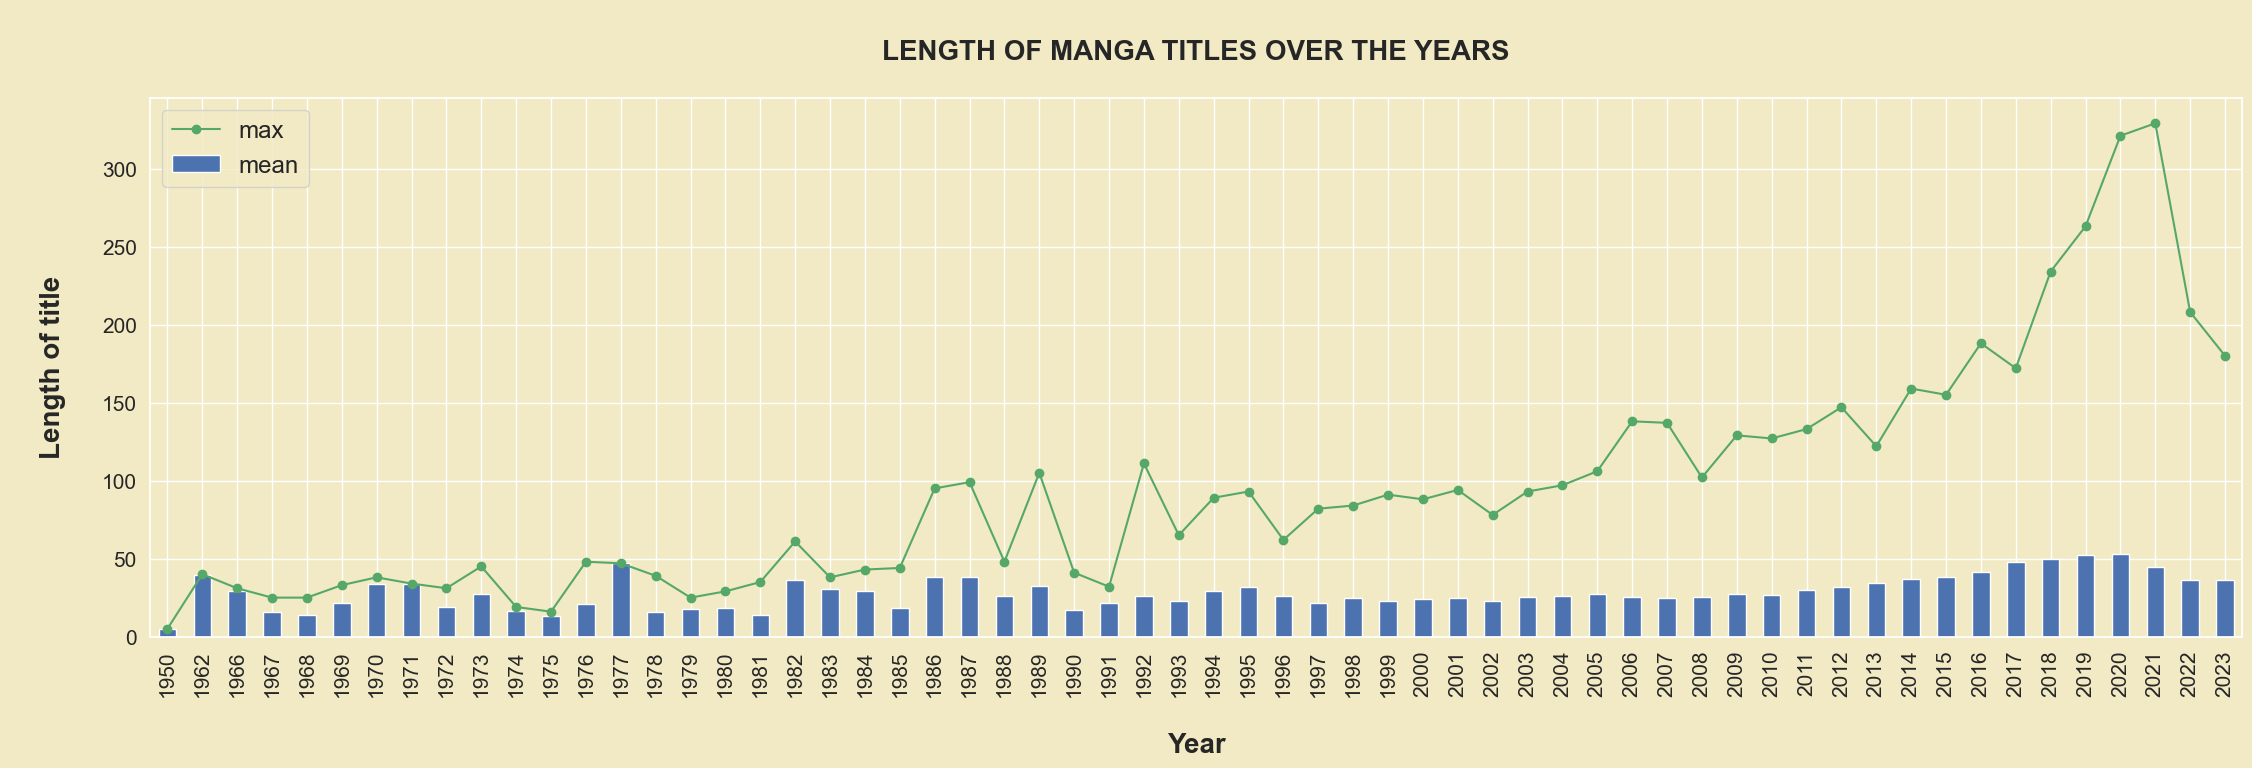

In [13]:
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
manga_copy_df = manga_df.copy()
new_col = manga_copy_df['Title'].str.len()
new_col.name = 'title_len'
manga_copy_df = pd.concat((manga_copy_df, new_col), axis=1)
manga_copy_df['Year'] = pd.to_datetime(manga_copy_df['Release date'], errors='coerce').dt.year

t = manga_copy_df[['title_len', 'Year']]
t2 = t.groupby('Year')['title_len'].agg(['mean', 'max']).reset_index()

ax = t2.plot(y='max', linestyle='-', marker='o', color='g')
t2.plot(x='Year', y='mean', kind='bar', ax=ax, figsize=(27,7), fontsize=15);
ax.legend(loc='upper left', fontsize='x-large');
ax.set_xlabel('\nYear', fontsize=20, weight='bold')
ax.set_ylabel('\nLength of title\n', fontsize=20, weight='bold');
ax.set_title('\nLENGTH OF MANGA TITLES OVER THE YEARS\n',fontsize=20, weight='bold');

### 📖 **COMMENTS:**
+ **`Mean`**:
    + The average title length of manga tends to increase over the years.
    + Most notably, the period from 2017 to 2021 is when the manga had the longest manga title in the years considered. It can be concluded that during this time period, the naming trend favored long names.
    + Overall, length of tiitle manga start from 10 characters and now this increaseing approximately 50.
    

+ **`Max`**:
    + Highest limit for titles that have increased dramatically over the years. Starting from 2005 to the present, we see a rapid increase in the length of manga titles.
    + The peak of this increase is **2019, 2020 and 2021**. These are the three milestones in the trend of giving long names to manga titles.
    + The longest title of a manga is approximately **350 characters** in 2021
    + After 2021, these lengths will begin to decrease sharply, but compared to the first years, they are still high.
    
+ **`Some reasons why many manga have long titles`**:
    + Because it helps the manga **stand out**. Due to the competition in the industry, authors have to find ways to grab the interest of readers. One such way that has become popular is via long titles.
    + Long titles, while difficult to remember, do not really drive away readers. In fact, if the series becomes popular, they will most certainly get nicknames for easier reminders
    + Because it can **easily convey the plot to potential readers**. Not everyone has the time or pleasure to read or view plot summaries on the back of light novels and/or manga. As such, long titles became a trend for people to easily know what the plot is about and if it would be to their liking.
    + The important point is that it gives you an idea of the setting of the story from the get go and gives you an idea whether it’s something you want to spend your precious time reading. That’s the truth of today’s society. Because we are inundated with content from all sides, we have to be careful choosing what we spend our time on.

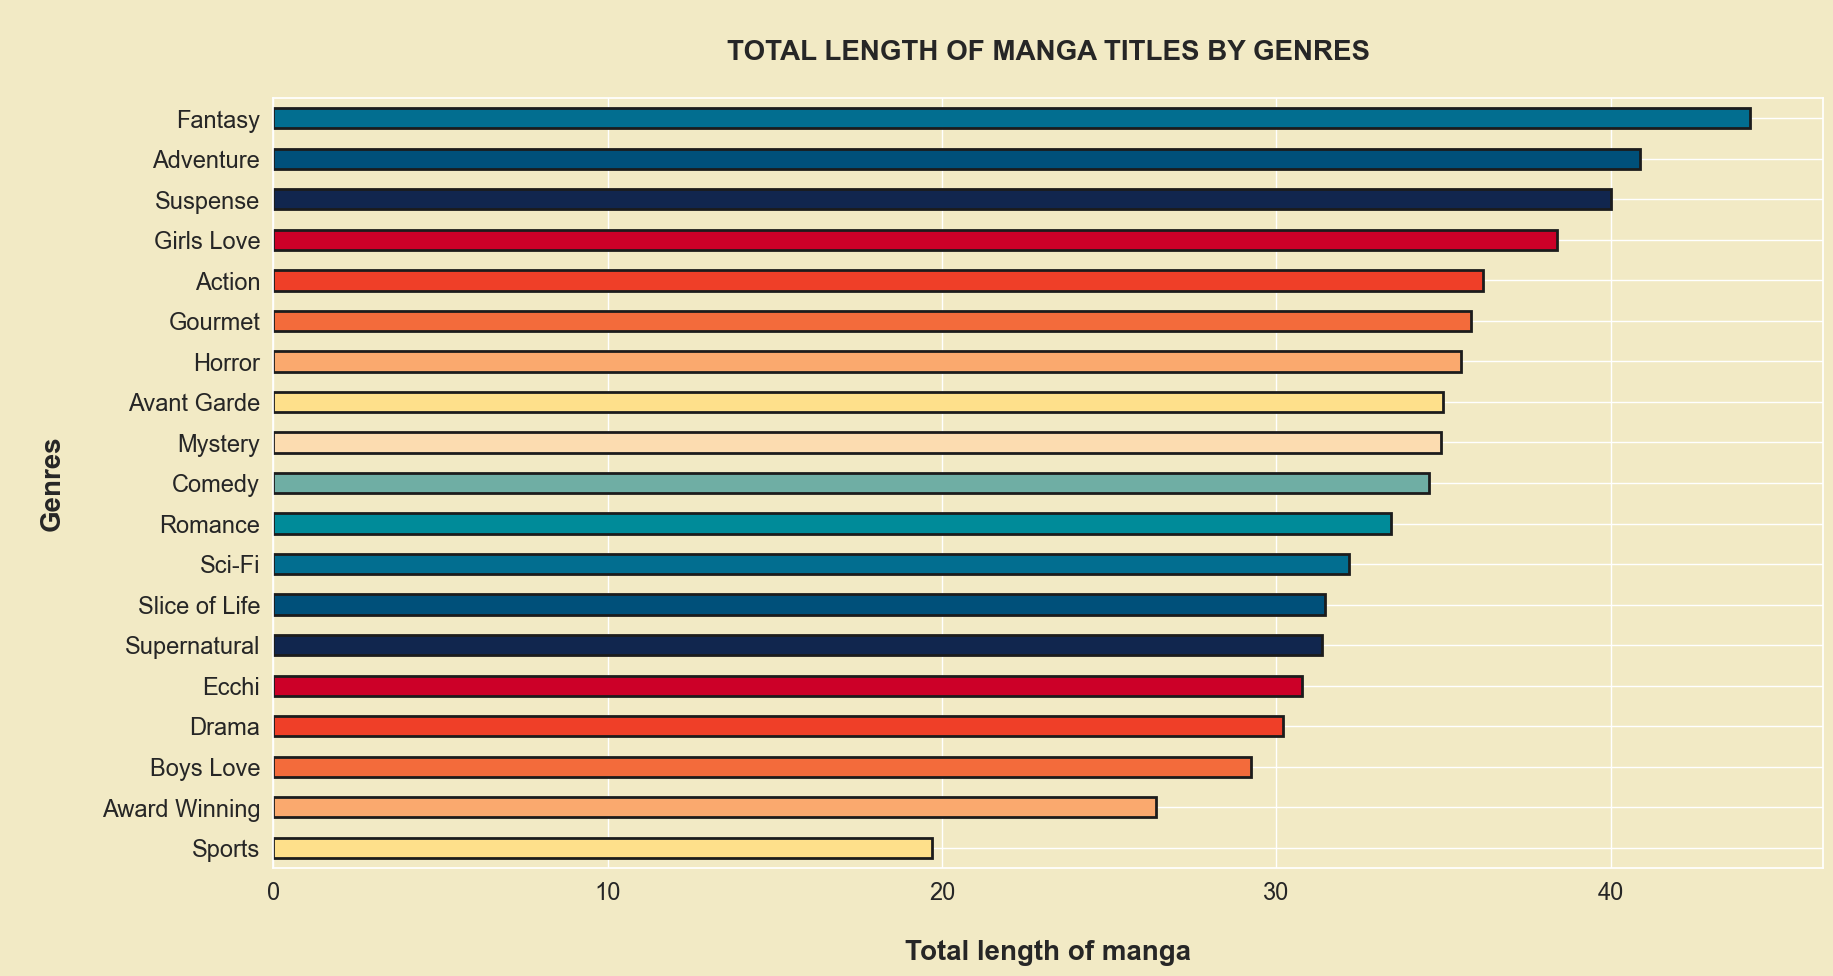

In [14]:
manga_copy_df['Genres'] = manga_copy_df['Genres'].apply(eval)
df = manga_copy_df.explode('Genres').reset_index()

color = ["#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028","#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0"]

df1 = df.groupby('Genres')['title_len'].mean().sort_values()
ax = df1.plot(kind='barh', figsize=(20,10), edgecolor ="#1c1c1c", linewidth=2, color=color,stacked=True, fontsize=17)
ax.set_xlabel('\nTotal length of manga', fontsize=20, weight='bold')
ax.set_ylabel('\nGenres\n', fontsize=20, weight='bold');
ax.set_title('\nTOTAL LENGTH OF MANGA TITLES BY GENRES\n',fontsize=20, weight='bold');


### 📖 **COMMENTS:**

+ Fantasy is the genre with the longest manga title.

+ Comedy and Romance are also genres with long titles besides Fantasy.

+ `Ecchi`, `Horror`, `Boys Love`, `Girl Love`, `Award Winning`, `Suspense`, `Sport`, `Goutmet` and `Avant Grarde` are genres that prefer shorter titles.

+ **`Why is Fantasy a genre that often has long titles?`**
    + Because as **`Question 4`** analyzed above, from 2005 until now, Fantasy is the most popular genre and it is also during these years that the trend of long titles has increased (analyzed above). From these two things it can be explained why Fantasy is the genre that is often given the longest name.

<a class="anchor" id="Question_06"></a>
<button class="btn" type="button">
  <strong>Question 06</strong>
  <div id="container-stars">
    <div id="stars"></div>
  </div>

  <div id="glow">
    <div class="circle"></div>
    <div class="circle"></div>
  </div>
</button>

<style>
.btn {
  display: flex;
  justify-content: center;
  align-items: center;
  width: 13rem;
  overflow: hidden;
  height: 5rem;
  background-size: 300% 300%;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
  transition: 0.5s;
  animation: gradient_301 5s ease infinite;
  border: double 4px transparent;
  background-image: linear-gradient(#212121, #212121),  linear-gradient(137.48deg, #ffdb3b 10%,#FE53BB 45%, #8F51EA 67%, #0044ff 87%);
  background-origin: border-box;
  background-clip: content-box, border-box;
}

#container-stars {
  position: absolute;
  z-index: -1;
  width: 100%;
  height: 100%;
  overflow: hidden;
  transition: 0.5s;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
}

strong {
  z-index: 2;
  font-family: 'Avalors Personal Use';
  font-size: 25px;
  letter-spacing: 5px;
  color: #FFFFFF;
  text-shadow: 0 0 4px white;
}

#glow {
  position: absolute;
  display: flex;
  width: 12rem;
}

.circle {
  width: 100%;
  height: 30px;
  filter: blur(2rem);
  animation: pulse_3011 4s infinite;
  z-index: -1;
}

.circle:nth-of-type(1) {
  background: rgba(254, 83, 186, 0.636);
}

.circle:nth-of-type(2) {
  background: rgba(142, 81, 234, 0.704);
}

.btn:hover #container-stars {
  z-index: 1;
  background-color: #212121;
}

.btn:hover {
  transform: scale(1.1)
}

.btn:active {
  border: double 4px #FE53BB;
  background-origin: border-box;
  background-clip: content-box, border-box;
  animation: none;
}

.btn:active .circle {
  background: #FE53BB;
}

#stars {
  position: relative;
  background: transparent;
  width: 200rem;
  height: 200rem;
}

#stars::after {
  content: "";
  position: absolute;
  top: -10rem;
  left: -100rem;
  width: 100%;
  height: 100%;
  animation: animStarRotate 90s linear infinite;
}

#stars::after {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
}

#stars::before {
  content: "";
  position: absolute;
  top: 0;
  left: -50%;
  width: 170%;
  height: 500%;
  animation: animStar 60s linear infinite;
}

#stars::before {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
  opacity: 0.5;
}

@keyframes animStar {
  from {
    transform: translateY(0);
  }

  to {
    transform: translateY(-135rem);
  }
}

@keyframes animStarRotate {
  from {
    transform: rotate(360deg);
  }

  to {
    transform: rotate(0);
  }
}

@keyframes gradient_301 {
  0% {
    background-position: 0% 50%;
  }

  50% {
    background-position: 100% 50%;
  }

  100% {
    background-position: 0% 50%;
  }
}

@keyframes pulse_3011 {
  0% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0.7);
  }

  70% {
    transform: scale(1);
    box-shadow: 0 0 0 10px rgba(0, 0, 0, 0);
  }

  100% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0);
  }
}
</style>

### <span style='color:#2B9C15 '> ❓ QUESTION </span>
+ **What is the relationship between the genres most authors (Mangaka) write about and the genres that readers love?**
+ **Are genres that readers like also liked by authors?**
+ **Is there any difference between the author's and reader's choices for each genre?**

### <span style='color:#2B9C15 '>👁️‍🗨️ PURPOSE </span>
+ Explore the connection between a well-written genre and a much-loved genre.
+ Know whether the most popular genre is the most written genre or not.
+ Somewhat understand whether authors will write based on current trends or write manga based on their strengths.
+ Identify the difference between the author's and the reader's reading tastes

### <span style='color:#2B9C15 '>📊 ANALYSIS </span>
+ For each genre, calculate the total number of authors writing in that genre.
+ For each genre, calculate the total number of Favorites of manga belonging to that genre.
+ Visualize data using `bar charts` combined with `line charts`. The **`bar chart`** shows the number of authors writing about that genre while the **`line chart`** shows the number of readers' favorites for that genre.

### 👉 **Code**


In [15]:
manga_copy_df = manga_df.copy()
manga_copy_df['Genres'] = manga_copy_df['Genres'].apply(eval)
manga_copy_df['Author'] = manga_copy_df['Author'].apply(eval)

df_genres_expanded = manga_copy_df.explode('Genres').reset_index()

df1 = df_genres_expanded.groupby('Genres')['Favorite'].sum().sort_values()
df1 = pd.DataFrame(df1)

df_author_expanded = manga_copy_df.explode('Author').reset_index()
df2 = df_author_expanded.merge(df_genres_expanded, on='Title')

df3 = df2.groupby('Genres_y')['Author_x'].count().reset_index()
df3 = pd.DataFrame(df3)
df3 = df3.rename(columns={'Genres_y': 'Genres', 'Author_x': 'Author'})

new_df = df3.merge(df1, on='Genres')
new_df = new_df.sort_values(by='Author', ascending=False)

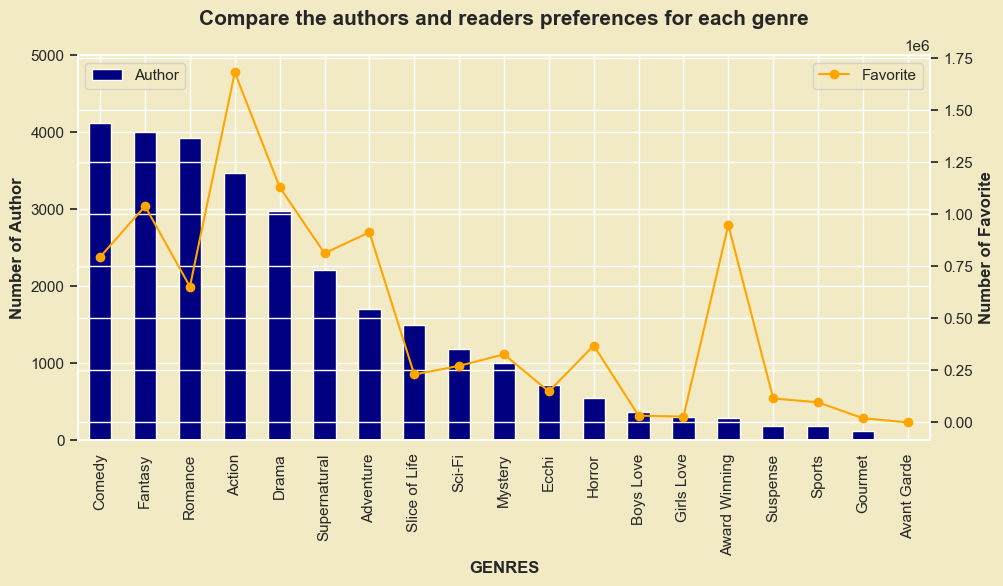

In [16]:
fig, ax = plt.subplots(figsize=(11,5))
new_df.plot(x='Genres',kind='bar', y='Author', ax=ax, ylim=(0,5000), color="navy")
ax.set_ylabel('Number of Author', fontsize=12, weight='bold')
ax.legend(loc='upper left');
ax.set_xlabel('GENRES', fontsize=12, weight='bold')

ax2 = ax.twinx()
new_df.plot(x='Genres',y='Favorite', ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Number of Favorite', fontsize=12, weight='bold')
ax2.set_xlabel('GENRES', fontsize=12, weight='bold')
ax.set_title('Compare the authors and readers preferences for each genre\n',fontsize=15, weight='bold');



### 📖 **COMMENTS:**
+ `Comedy`, `Fantasy` and `Romance` are the genres written by most authors while `Action`, `Drama` and `Award Winning` are the genres most loved by readers.

+ Most notably, `Award Winning` is one of the most loved genres by readers but there are very few authors writing about this genre. Therefore, it can be concluded that the reading tastes of authors and readers are different.

+ In addition, `Action` is the genre most loved by readers but is not the genre most written about.

+ `Comedy` is the genre most chosen by authors to write in, but this genre is not recommended by readers. The reason for this difference may be because there are so many manga series written that readers no longer find them new and interesting.

+ It seems that the majority of authors choose to write their works based on their strengths instead of following trends. Of course, just using the chart above to draw conclusions is not accurate, but it does provide us with more information and insights about data.

<a class="anchor" id="Question_07"></a>
<button class="btn" type="button">
  <strong>Question 07</strong>
  <div id="container-stars">
    <div id="stars"></div>
  </div>

  <div id="glow">
    <div class="circle"></div>
    <div class="circle"></div>
  </div>
</button>

<style>
.btn {
  display: flex;
  justify-content: center;
  align-items: center;
  width: 13rem;
  overflow: hidden;
  height: 5rem;
  background-size: 300% 300%;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
  transition: 0.5s;
  animation: gradient_301 5s ease infinite;
  border: double 4px transparent;
  background-image: linear-gradient(#212121, #212121),  linear-gradient(137.48deg, #ffdb3b 10%,#FE53BB 45%, #8F51EA 67%, #0044ff 87%);
  background-origin: border-box;
  background-clip: content-box, border-box;
}

#container-stars {
  position: absolute;
  z-index: -1;
  width: 100%;
  height: 100%;
  overflow: hidden;
  transition: 0.5s;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
}

strong {
  z-index: 2;
  font-family: 'Avalors Personal Use';
  font-size: 25px;
  letter-spacing: 5px;
  color: #FFFFFF;
  text-shadow: 0 0 4px white;
}

#glow {
  position: absolute;
  display: flex;
  width: 12rem;
}

.circle {
  width: 100%;
  height: 30px;
  filter: blur(2rem);
  animation: pulse_3011 4s infinite;
  z-index: -1;
}

.circle:nth-of-type(1) {
  background: rgba(254, 83, 186, 0.636);
}

.circle:nth-of-type(2) {
  background: rgba(142, 81, 234, 0.704);
}

.btn:hover #container-stars {
  z-index: 1;
  background-color: #212121;
}

.btn:hover {
  transform: scale(1.1)
}

.btn:active {
  border: double 4px #FE53BB;
  background-origin: border-box;
  background-clip: content-box, border-box;
  animation: none;
}

.btn:active .circle {
  background: #FE53BB;
}

#stars {
  position: relative;
  background: transparent;
  width: 200rem;
  height: 200rem;
}

#stars::after {
  content: "";
  position: absolute;
  top: -10rem;
  left: -100rem;
  width: 100%;
  height: 100%;
  animation: animStarRotate 90s linear infinite;
}

#stars::after {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
}

#stars::before {
  content: "";
  position: absolute;
  top: 0;
  left: -50%;
  width: 170%;
  height: 500%;
  animation: animStar 60s linear infinite;
}

#stars::before {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
  opacity: 0.5;
}

@keyframes animStar {
  from {
    transform: translateY(0);
  }

  to {
    transform: translateY(-135rem);
  }
}

@keyframes animStarRotate {
  from {
    transform: rotate(360deg);
  }

  to {
    transform: rotate(0);
  }
}

@keyframes gradient_301 {
  0% {
    background-position: 0% 50%;
  }

  50% {
    background-position: 100% 50%;
  }

  100% {
    background-position: 0% 50%;
  }
}

@keyframes pulse_3011 {
  0% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0.7);
  }

  70% {
    transform: scale(1);
    box-shadow: 0 0 0 10px rgba(0, 0, 0, 0);
  }

  100% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0);
  }
}
</style>

### <span style='color:#2B9C15 '> ❓ QUESTION </span>
+ **How has the number of manga releases changed over time from the past to the present?**

### <span style='color:#2B9C15 '>👁️‍🗨️ PURPOSE </span>
- Understand the historical development of manga: Trace the growth of the manga industry from its early stages to the present day.
- Identify trends in manga releases: Observe how the number of manga releases has changed over time and identify any significant changes or patterns.

### <span style='color:#2B9C15 '>📊 ANALYSIS </span>
- Create a new column `Year` to extract the year from `Released date` column.
- Create a new column `Decade` by dividing `Year` by 10 and rounding down to the nearest integer.
- Group the data by `Year` and by `Decade` and calculate the number of manga releases for each year and decade.
- Visualize the data using a bar chart to observe trends in manga releases over time.

### 👉 **Code**


In [17]:
df_copy = manga_df.copy()
df_copy['Release date'] = pd.to_datetime(df_copy['Release date'], errors='coerce')
# group by year and count the number of manga released in each year
df_copy['Year'] = df_copy['Release date'].dt.year.astype('Int64')
df_copy['Decade'] = df_copy['Year'] // 10 * 10

manga_per_year = df_copy.groupby('Year').size().reset_index(name='Count')
manga_per_decade = df_copy.groupby('Decade').size().reset_index(name='Count')

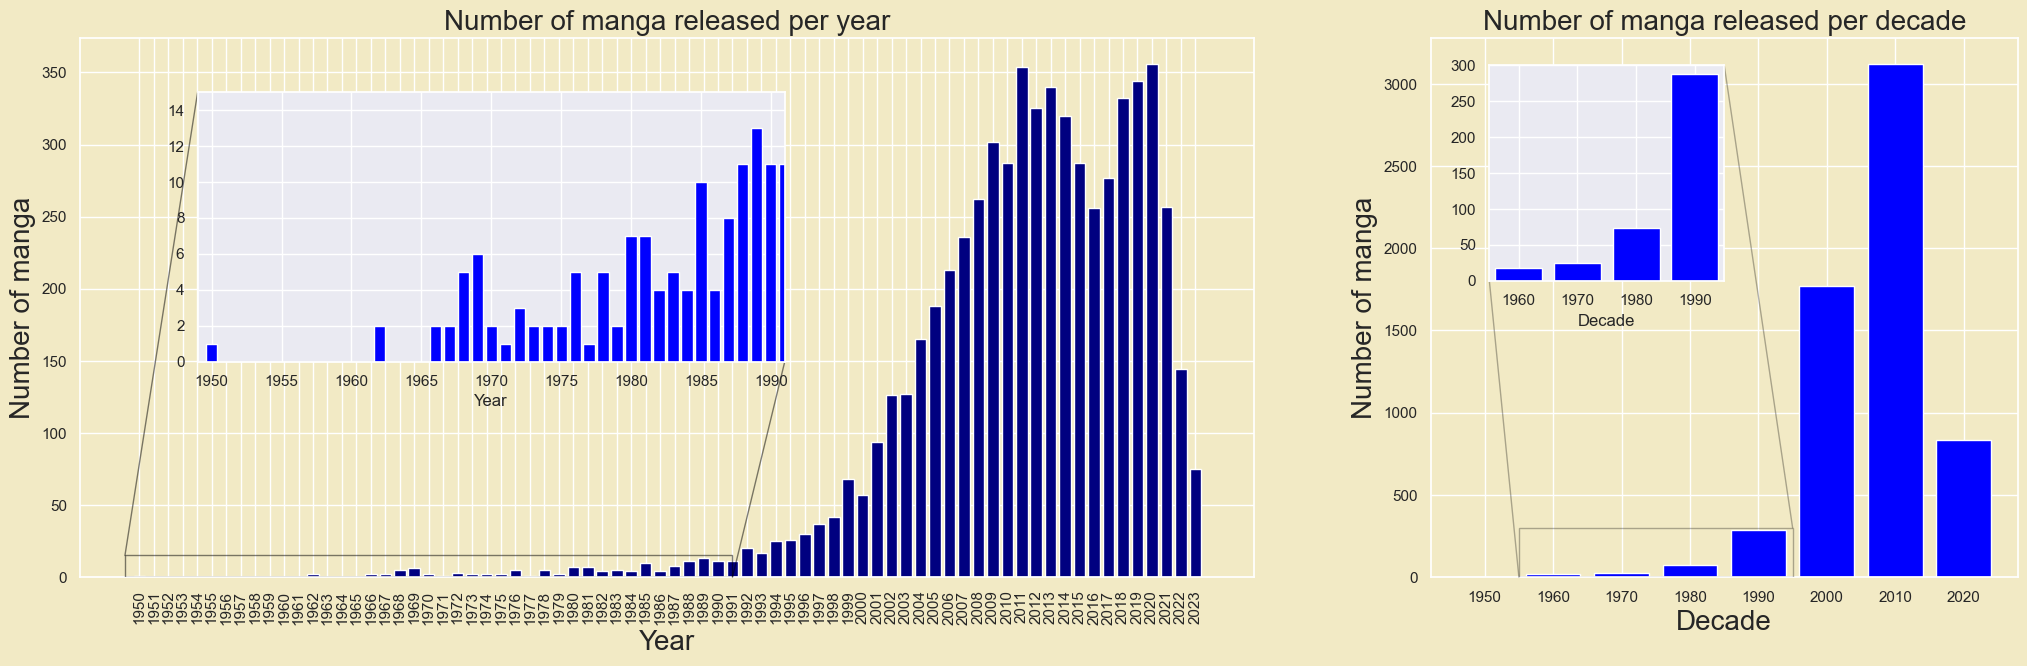

In [18]:

# Plotting the number of manga released per year and the number of manga released per decade
fig, axes = plt.subplots(1, 2, figsize=(25, 7), gridspec_kw={'width_ratios': [2, 1]})
sns.set_style('darkgrid')
axes[0].bar(manga_per_year['Year'], manga_per_year['Count'], color='navy')
axes[0].set_title('Number of manga released per year', fontsize=20)
axes[0].set_xlabel('Year', fontsize=20)
axes[0].set_ylabel('Number of manga', fontsize=20)
axes[0].set_xticks(range(1950, 2024, 1))
axes[0].set_xticklabels(range(1950, 2024, 1), rotation=90)

axin = axes[0].inset_axes([0.1, 0.4, 0.5, 0.5])
axin.bar(manga_per_year['Year'], manga_per_year['Count'], color='blue', width=0.8)
axin.set_xlim(1949, 1991)
axin.set_ylim(0, 15)
axin.set_xticks(range(1950, 1991, 5))
axin.set_xlabel('Year')
axin.set_ylabel('')

axes[0].indicate_inset_zoom(axin, edgecolor="black", linewidth=1, alpha=0.5)

axes[1].bar(manga_per_decade['Decade'], manga_per_decade['Count'], color='blue', width=8)
axes[1].set_title('Number of manga released per decade', fontsize=20)
axes[1].set_xlabel('Decade', fontsize=20)
axes[1].set_ylabel('Number of manga', fontsize=20)

axin = axes[1].inset_axes([0.1, 0.55, 0.4, 0.4])
axin.bar(manga_per_decade['Decade'], manga_per_decade['Count'], color='blue', width=8)
axin.set_xlim(1955, 1995)
axin.set_ylim(0, 300)
axin.set_xlabel('Decade')
axin.set_ylabel('')
axes[1].indicate_inset_zoom(axin, edgecolor="black", linewidth=1, alpha=0.3)

plt.show()


### 📖 **COMMENTS:**
The two charts not only help us analyze the number of manga releases but also provide insights into the development of the Japanese manga industry:

- **Overview**: 

It is noticeable that the number of manga releases has been increasing over the years, but there has been a significant decrease in recent years (2020 onwards). The quantity of manga releases, as well as the development process of the Japanese manga industry, can be divided into several periods:

- **1950-1970: Early Stage**

Although there were manga works before this period in Japan, the dataset only has information from 1950. This period can be considered the inception of the Japanese manga industry, with a relatively limited number of manga releases, only a few mangas per year, with the highest being 6 mangas in 1969.

- **1970-1990: Initial Development**

During this period, the number of manga releases increased compared to the previous stage, indicating the beginning of the development of the Japanese manga industry. The quantity of manga releases gradually increased each year, around 7-8 mangas per year. This period also marked the time when the Japanese manga industry began to spread globally with works like Dragon Ball, Tsubasa, etc.

- **1990-2010: Strong Development**

This period witnessed a significant surge in the number of manga releases compared to the previous stage (from 10 mangas per year to over 200 mangas per year). It was also a time when the Japanese manga industry expanded globally with famous works such as Naruto, One Piece, Bleach, etc.

- **2010-present: Peak and Recent Decline**

This period saw the Japanese manga industry reaching its peak in terms of the quantity of manga releases, global popularity, and coverage, with over 300 mangas per year, reaching the pinnacle at 356 mangas in 2020. However, from 2020 onwards, possibly due to the heavy impact of the Covid-19 pandemic, the number of manga releases has significantly declined.




<a class="anchor" id="Question_08"></a>
<button class="btn" type="button">
  <strong>Question 08</strong>
  <div id="container-stars">
    <div id="stars"></div>
  </div>

  <div id="glow">
    <div class="circle"></div>
    <div class="circle"></div>
  </div>
</button>

<style>
.btn {
  display: flex;
  justify-content: center;
  align-items: center;
  width: 13rem;
  overflow: hidden;
  height: 5rem;
  background-size: 300% 300%;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
  transition: 0.5s;
  animation: gradient_301 5s ease infinite;
  border: double 4px transparent;
  background-image: linear-gradient(#212121, #212121),  linear-gradient(137.48deg, #ffdb3b 10%,#FE53BB 45%, #8F51EA 67%, #0044ff 87%);
  background-origin: border-box;
  background-clip: content-box, border-box;
}

#container-stars {
  position: absolute;
  z-index: -1;
  width: 100%;
  height: 100%;
  overflow: hidden;
  transition: 0.5s;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
}

strong {
  z-index: 2;
  font-family: 'Avalors Personal Use';
  font-size: 25px;
  letter-spacing: 5px;
  color: #FFFFFF;
  text-shadow: 0 0 4px white;
}

#glow {
  position: absolute;
  display: flex;
  width: 12rem;
}

.circle {
  width: 100%;
  height: 30px;
  filter: blur(2rem);
  animation: pulse_3011 4s infinite;
  z-index: -1;
}

.circle:nth-of-type(1) {
  background: rgba(254, 83, 186, 0.636);
}

.circle:nth-of-type(2) {
  background: rgba(142, 81, 234, 0.704);
}

.btn:hover #container-stars {
  z-index: 1;
  background-color: #212121;
}

.btn:hover {
  transform: scale(1.1)
}

.btn:active {
  border: double 4px #FE53BB;
  background-origin: border-box;
  background-clip: content-box, border-box;
  animation: none;
}

.btn:active .circle {
  background: #FE53BB;
}

#stars {
  position: relative;
  background: transparent;
  width: 200rem;
  height: 200rem;
}

#stars::after {
  content: "";
  position: absolute;
  top: -10rem;
  left: -100rem;
  width: 100%;
  height: 100%;
  animation: animStarRotate 90s linear infinite;
}

#stars::after {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
}

#stars::before {
  content: "";
  position: absolute;
  top: 0;
  left: -50%;
  width: 170%;
  height: 500%;
  animation: animStar 60s linear infinite;
}

#stars::before {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
  opacity: 0.5;
}

@keyframes animStar {
  from {
    transform: translateY(0);
  }

  to {
    transform: translateY(-135rem);
  }
}

@keyframes animStarRotate {
  from {
    transform: rotate(360deg);
  }

  to {
    transform: rotate(0);
  }
}

@keyframes gradient_301 {
  0% {
    background-position: 0% 50%;
  }

  50% {
    background-position: 100% 50%;
  }

  100% {
    background-position: 0% 50%;
  }
}

@keyframes pulse_3011 {
  0% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0.7);
  }

  70% {
    transform: scale(1);
    box-shadow: 0 0 0 10px rgba(0, 0, 0, 0);
  }

  100% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0);
  }
}
</style>

### <span style='color:#2B9C15 '> ❓ QUESTION </span>
+ **How does the number of manga released vary across different seasons throughout the year? Are there discernible trends in the distribution of manga releases by season?**

### <span style='color:#2B9C15 '>👁️‍🗨️ PURPOSE </span>
- Gain insights into manga release cycles, unveiling patterns in manga releases. 
- Provide valuable information for publishers, fans, and industry professionals for informed planning, marketing strategies, and decision-making.

### <span style='color:#2B9C15 '>📊 ANALYSIS </span>
- Create a new column `Season` to store the season of the year in which the manga was released.
- Group the data by `Season` and calculate the total number of manga releases in each season.
- Visualize the data using a bar chart to observe trends and patterns in manga releases across seasons.

### 👉 **Code**

In [19]:
df_copy['Month'] = df_copy['Release date'].dt.month.astype('Int64')
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
df_copy['Season'] = pd.cut(df_copy['Month'], [0, 3, 6, 9, 12], labels=seasons, include_lowest=True)
manga_per_season = df_copy[df_copy['Year'] >= 1990].groupby(['Decade', 'Season']).size().reset_index(name='Count')
manga_per_season['Percentage'] = manga_per_season['Count'] / manga_per_season.groupby('Decade')['Count'].transform('sum') * 100

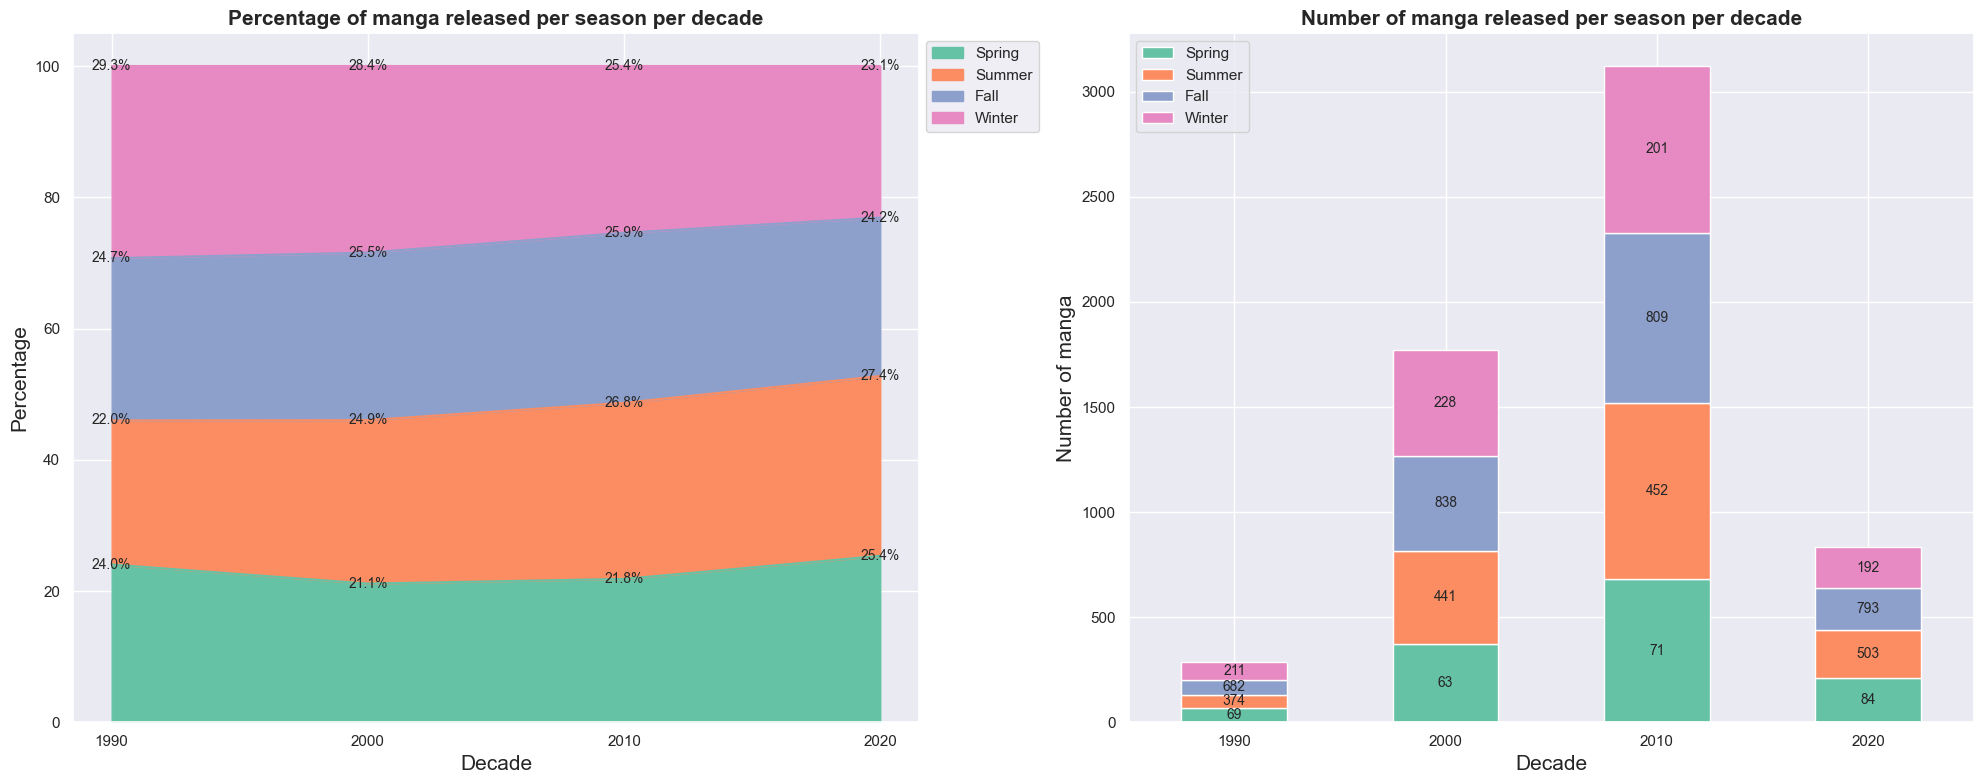

In [20]:
sns.set(style="darkgrid")
sns.set_palette("Set2")

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

manga_per_season.groupby(['Decade', 'Season'])['Percentage'].sum().unstack().plot(kind='area', stacked=True, ax=ax[0])
ax[0].set_title('Percentage of manga released per season per decade', fontsize=15, fontweight='bold')
ax[0].set_xlabel('Decade', fontsize=15)
ax[0].set_ylabel('Percentage', fontsize=15)
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1, 0, 0))
ax[0].set_xticks(range(1990, 2030, 10))

manga_per_season.groupby(['Decade', 'Season'])['Count'].sum().unstack().plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Number of manga released per season per decade', fontsize=15, fontweight='bold')
ax[1].set_xlabel('Decade', fontsize=15)
ax[1].set_ylabel('Number of manga', fontsize=15)
ax[1].legend(loc='upper left')
ax[1].set_xticklabels(manga_per_season['Decade'].unique(), rotation=0)

for decade, row in manga_per_season.groupby('Decade'):
    if decade in ax[0].get_xticks():
        temp = 0
        for season, percentage in row.set_index('Season')['Percentage'].items():
            x_pos = decade
            temp += percentage
            y_pos = temp
            ax[0].text(x_pos, y_pos, f"{percentage:.1f}%", ha='center', va='center', fontsize=10)

bars = ax[1].patches
for bar, (index, decade, season, count) in zip(bars, manga_per_season[['Decade', 'Season', 'Count']].itertuples()):
    x_pos = bar.get_x() + bar.get_width() / 2
    y_pos = bar.get_y() + bar.get_height() / 2
    ax[1].text(x_pos, y_pos, f"{count:,}", ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()


### 📖 **COMMENTS:**
**General Overview:**
The manga release proportions across seasons appear to show a relatively stable pattern over the years, with no significant deviations among seasons. However, a closer examination reveals intriguing trends spanning the last three decades (1990-2020).

**Seasonal Variations:**
1. **Spring and Autumn Stability:**
   - The manga release rates during spring and autumn exhibit minimal fluctuations from 1990 to the present. This suggests a consistent trend in the industry during these seasons.

2. **1990-2000 Shifts:**
   - During the 1990-2000 period, there is a notable distinction in the release patterns. Winter sees a higher percentage of manga releases compared to other seasons, while summer experiences the lowest release rates.
   - This could be attributed to historical publishing practices or specific genre preferences during that era.

3. **2000 Onwards Dynamics:**
   - A remarkable shift in manga release patterns becomes evident from 2000 onwards.
   - Notably, the proportion of manga releases during summer shows a steady increase, rising from 22% to 27.4%.
   - Conversely, the winter season witnesses a gradual decline, dropping from 29.3% to 23.1%.
   - This change might reflect evolving reader preferences, market dynamics, or shifts in the industry's strategies.




<a class="anchor" id="Question_09"></a>
<button class="btn" type="button">
  <strong>Question 09</strong>
  <div id="container-stars">
    <div id="stars"></div>
  </div>

  <div id="glow">
    <div class="circle"></div>
    <div class="circle"></div>
  </div>
</button>

<style>
.btn {
  display: flex;
  justify-content: center;
  align-items: center;
  width: 13rem;
  overflow: hidden;
  height: 5rem;
  background-size: 300% 300%;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
  transition: 0.5s;
  animation: gradient_301 5s ease infinite;
  border: double 4px transparent;
  background-image: linear-gradient(#212121, #212121),  linear-gradient(137.48deg, #ffdb3b 10%,#FE53BB 45%, #8F51EA 67%, #0044ff 87%);
  background-origin: border-box;
  background-clip: content-box, border-box;
}

#container-stars {
  position: absolute;
  z-index: -1;
  width: 100%;
  height: 100%;
  overflow: hidden;
  transition: 0.5s;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
}

strong {
  z-index: 2;
  font-family: 'Avalors Personal Use';
  font-size: 25px;
  letter-spacing: 5px;
  color: #FFFFFF;
  text-shadow: 0 0 4px white;
}

#glow {
  position: absolute;
  display: flex;
  width: 12rem;
}

.circle {
  width: 100%;
  height: 30px;
  filter: blur(2rem);
  animation: pulse_3011 4s infinite;
  z-index: -1;
}

.circle:nth-of-type(1) {
  background: rgba(254, 83, 186, 0.636);
}

.circle:nth-of-type(2) {
  background: rgba(142, 81, 234, 0.704);
}

.btn:hover #container-stars {
  z-index: 1;
  background-color: #212121;
}

.btn:hover {
  transform: scale(1.1)
}

.btn:active {
  border: double 4px #FE53BB;
  background-origin: border-box;
  background-clip: content-box, border-box;
  animation: none;
}

.btn:active .circle {
  background: #FE53BB;
}

#stars {
  position: relative;
  background: transparent;
  width: 200rem;
  height: 200rem;
}

#stars::after {
  content: "";
  position: absolute;
  top: -10rem;
  left: -100rem;
  width: 100%;
  height: 100%;
  animation: animStarRotate 90s linear infinite;
}

#stars::after {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
}

#stars::before {
  content: "";
  position: absolute;
  top: 0;
  left: -50%;
  width: 170%;
  height: 500%;
  animation: animStar 60s linear infinite;
}

#stars::before {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
  opacity: 0.5;
}

@keyframes animStar {
  from {
    transform: translateY(0);
  }

  to {
    transform: translateY(-135rem);
  }
}

@keyframes animStarRotate {
  from {
    transform: rotate(360deg);
  }

  to {
    transform: rotate(0);
  }
}

@keyframes gradient_301 {
  0% {
    background-position: 0% 50%;
  }

  50% {
    background-position: 100% 50%;
  }

  100% {
    background-position: 0% 50%;
  }
}

@keyframes pulse_3011 {
  0% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0.7);
  }

  70% {
    transform: scale(1);
    box-shadow: 0 0 0 10px rgba(0, 0, 0, 0);
  }

  100% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0);
  }
}
</style>

## Question 09 <a class="anchor" id="Question_09"></a>

### <span style='color:#2B9C15 '> ❓ QUESTION </span>
+ **How are the `Genres` and preferences of readers?**

### <span style='color:#2B9C15 '>👁️‍🗨️ PURPOSE </span>
- To determine which genres are popular among readers and to identify the genres for which readers give high voting scores.

### <span style='color:#2B9C15 '>📊 ANALYSIS </span>
+ Calculate the top 5 genres with the highest popularity scores
+ Calculate the top 5 genres with the highest voting scores


### 👉 **Code**

In [21]:
manga_copy_df = manga_df.copy()

listGenresColumns = manga_copy_df['Genres'].tolist()
listGenresColumns = [ast.literal_eval(listGenres) for listGenres in listGenresColumns]
listGenresColumns

genreCount = {}

genreCount = Counter(genre for listGenres in listGenresColumns for genre in listGenres)

df_genre_count = pd.DataFrame([genreCount.values()], columns=genreCount.keys())

df_genre_count = df_genre_count.rename(index={0: 'Count'})
manga_copy_df['Genres'] = manga_copy_df['Genres'].apply(eval)
df_genres_expanded = manga_copy_df.explode('Genres').reset_index()
popular_genre = df_genres_expanded.groupby('Genres')['Popularity'].mean().sort_values(ascending=False).index[0:5]
score_genre = df_genres_expanded.groupby('Genres')['Score'].mean().sort_values(ascending=False).index[0:5]
popular_genre_data = df_genres_expanded[df_genres_expanded['Genres'].isin(popular_genre)]
popular_genre_data = popular_genre_data.groupby('Genres')['Popularity'].mean().sort_values(ascending=False)

score_genre_data = df_genres_expanded[df_genres_expanded['Genres'].isin(score_genre)]
score_genre_data = score_genre_data.groupby('Genres')['Score'].mean().sort_values(ascending=False)


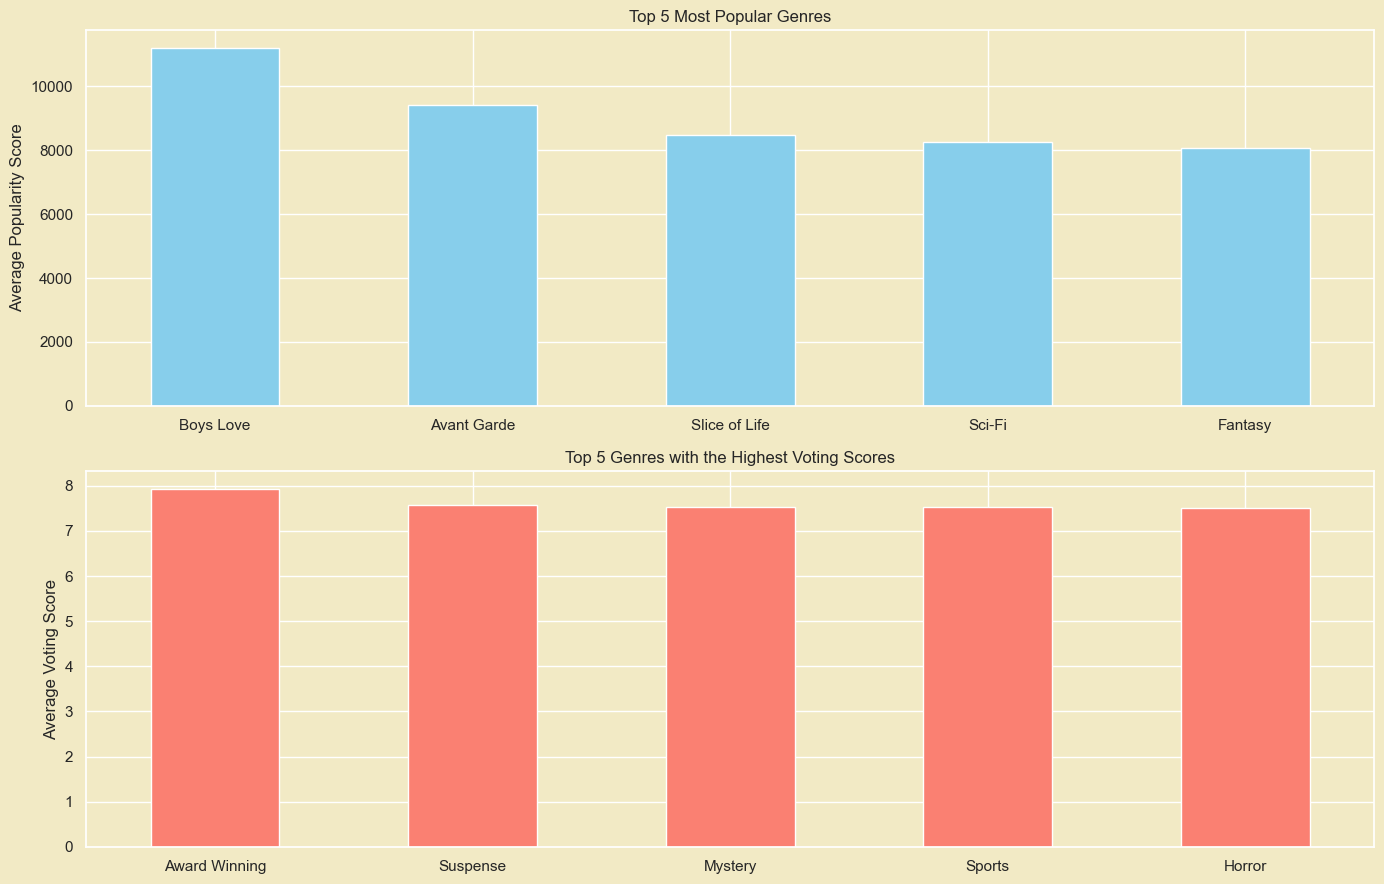

In [22]:

sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
fig, axes = plt.subplots(nrows=2, figsize=(14, 9))

popular_genre_data.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 5 Most Popular Genres')
axes[0].set_ylabel('Average Popularity Score')
axes[0].set_xlabel('')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

score_genre_data.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Top 5 Genres with the Highest Voting Scores')
axes[1].set_ylabel('Average Voting Score')
axes[1].set_xlabel('')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

### 📖 **COMMENTS:**
### Below are all the genres present in the given dataset

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Action</th>
      <th>Adventure</th>
      <th>Award Winning</th>
      <th>Drama</th>
      <th>Fantasy</th>
      <th>Horror</th>
      <th>Supernatural</th>
      <th>Mystery</th>
      <th>Sports</th>
      <th>Slice of Life</th>
      <th>Sci-Fi</th>
      <th>Comedy</th>
      <th>Romance</th>
      <th>Ecchi</th>
      <th>Suspense</th>
      <th>Boys Love</th>
      <th>Girls Love</th>
      <th>Gourmet</th>
      <th>Avant Garde</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Count</th>
      <td>1801</td>
      <td>889</td>
      <td>255</td>
      <td>1866</td>
      <td>1988</td>
      <td>300</td>
      <td>1323</td>
      <td>556</td>
      <td>144</td>
      <td>938</td>
      <td>597</td>
      <td>2481</td>
      <td>2517</td>
      <td>397</td>
      <td>113</td>
      <td>285</td>
      <td>207</td>
      <td>78</td>
      <td>4</td>
    </tr>
  </tbody>
</table>
</div>

### Overview:
- As observed, the `genres` that appear most frequently are Action, Drama, Comedy, and Romance.
- However, from the charts, the `genres` with the highest `Average Popularity Score` are Boys Love, Avant Garde, Slice of Life, Sci-Fi, Fantasy. Additionally, the genres with the highest `Average Voting Score` are Award Winning, Suspense, Mystery, Sports, Horror.

- From this, we can infer that the correlation between `Popularity` and `Genre` is not high, indicating that the popularity level is influenced by factors beyond the variety of genres. Similarly, the same holds true for `Score`, suggesting that the score is not solely determined by the genre but is influenced by other factors as well.

<a class="anchor" id="Question_10"></a>
<button class="btn" type="button">
  <strong>Question 10</strong>
  <div id="container-stars">
    <div id="stars"></div>
  </div>

  <div id="glow">
    <div class="circle"></div>
    <div class="circle"></div>
  </div>
</button>

<style>
.btn {
  display: flex;
  justify-content: center;
  align-items: center;
  width: 13rem;
  overflow: hidden;
  height: 5rem;
  background-size: 300% 300%;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
  transition: 0.5s;
  animation: gradient_301 5s ease infinite;
  border: double 4px transparent;
  background-image: linear-gradient(#212121, #212121),  linear-gradient(137.48deg, #ffdb3b 10%,#FE53BB 45%, #8F51EA 67%, #0044ff 87%);
  background-origin: border-box;
  background-clip: content-box, border-box;
}

#container-stars {
  position: absolute;
  z-index: -1;
  width: 100%;
  height: 100%;
  overflow: hidden;
  transition: 0.5s;
  backdrop-filter: blur(1rem);
  border-radius: 5rem;
}

strong {
  z-index: 2;
  font-family: 'Avalors Personal Use';
  font-size: 25px;
  letter-spacing: 5px;
  color: #FFFFFF;
  text-shadow: 0 0 4px white;
}

#glow {
  position: absolute;
  display: flex;
  width: 12rem;
}

.circle {
  width: 100%;
  height: 30px;
  filter: blur(2rem);
  animation: pulse_3011 4s infinite;
  z-index: -1;
}

.circle:nth-of-type(1) {
  background: rgba(254, 83, 186, 0.636);
}

.circle:nth-of-type(2) {
  background: rgba(142, 81, 234, 0.704);
}

.btn:hover #container-stars {
  z-index: 1;
  background-color: #212121;
}

.btn:hover {
  transform: scale(1.1)
}

.btn:active {
  border: double 4px #FE53BB;
  background-origin: border-box;
  background-clip: content-box, border-box;
  animation: none;
}

.btn:active .circle {
  background: #FE53BB;
}

#stars {
  position: relative;
  background: transparent;
  width: 200rem;
  height: 200rem;
}

#stars::after {
  content: "";
  position: absolute;
  top: -10rem;
  left: -100rem;
  width: 100%;
  height: 100%;
  animation: animStarRotate 90s linear infinite;
}

#stars::after {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
}

#stars::before {
  content: "";
  position: absolute;
  top: 0;
  left: -50%;
  width: 170%;
  height: 500%;
  animation: animStar 60s linear infinite;
}

#stars::before {
  background-image: radial-gradient(#ffffff 1px, transparent 1%);
  background-size: 50px 50px;
  opacity: 0.5;
}

@keyframes animStar {
  from {
    transform: translateY(0);
  }

  to {
    transform: translateY(-135rem);
  }
}

@keyframes animStarRotate {
  from {
    transform: rotate(360deg);
  }

  to {
    transform: rotate(0);
  }
}

@keyframes gradient_301 {
  0% {
    background-position: 0% 50%;
  }

  50% {
    background-position: 100% 50%;
  }

  100% {
    background-position: 0% 50%;
  }
}

@keyframes pulse_3011 {
  0% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0.7);
  }

  70% {
    transform: scale(1);
    box-shadow: 0 0 0 10px rgba(0, 0, 0, 0);
  }

  100% {
    transform: scale(0.75);
    box-shadow: 0 0 0 0 rgba(0, 0, 0, 0);
  }
}
</style>

## Question 10 <a class="anchor" id="Question_10"></a>


### <span style='color:#2B9C15 '> ❓ QUESTION </span>
+ **Which decade saw the boom of mangas, the most highly acclaimed series of that decade, and the most popular `genre` in each decade?**

### <span style='color:#2B9C15 '>👁️‍🗨️ PURPOSE </span>
- To determine the `highest-rated` manga series during the peak development period and identify the most popular `genre` of that decade.

### <span style='color:#2B9C15 '>📊 ANALYSIS </span>
+ Visualize all manga by each `decade` in the `Release Date` column to identify the decade with the highest number of manga releases.
+ Identify the `genres` that appear most frequently for each decade.
+ Highlight the manga with the highest `scores` for each year within that decade.

### 👉 **Code**

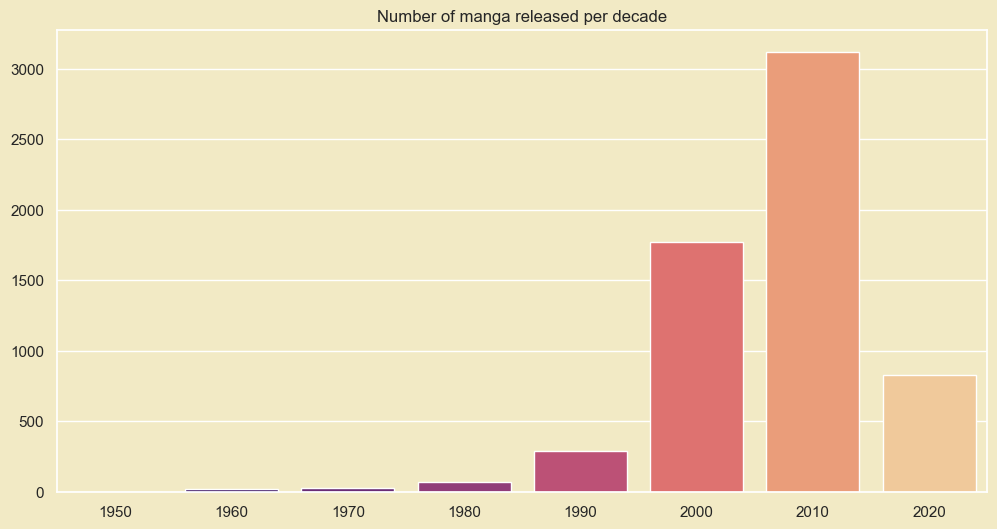

In [23]:
manga_copy_df = manga_df.copy()
manga_copy_df['Release date'] = pd.to_datetime(manga_copy_df['Release date'])

manga_copy_df['Decade'] = (manga_copy_df['Release date'].dt.year // 10) * 10

manga_counts_by_decade = manga_copy_df['Decade'].value_counts().sort_index()

fig, axes = plt.subplots(1, 1, figsize=(12,6))
sns.barplot(x=manga_counts_by_decade.index, y=manga_counts_by_decade.values, palette="magma", ax = axes)
axes.set_title('Number of manga released per decade')
axes.set_xlabel('')
axes.set_ylabel('')
plt.show()

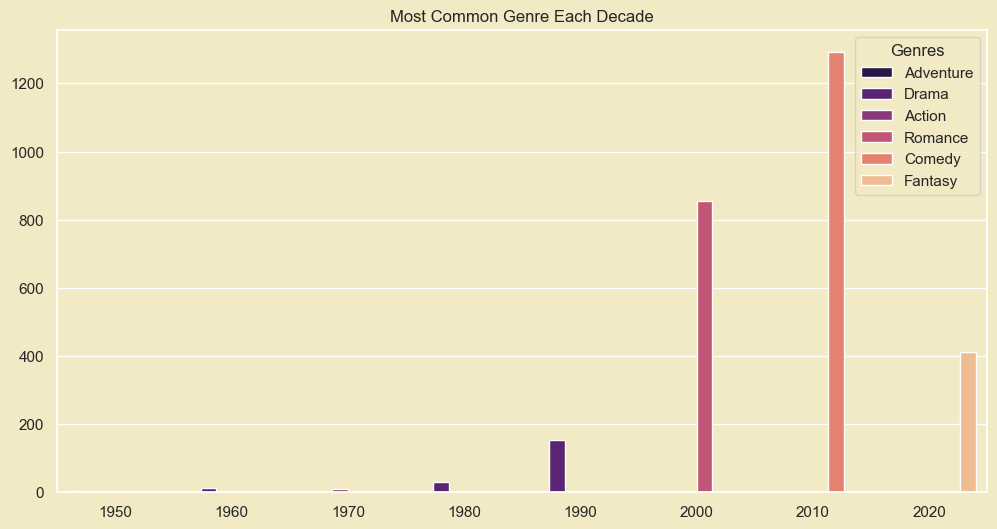

In [24]:
df_genres_expanded['Release date'] = pd.to_datetime(df_genres_expanded['Release date'])

df_genres_expanded['Decade'] = (df_genres_expanded['Release date'].dt.year // 10) * 10

genre_counts_per_decade = df_genres_expanded.groupby(['Decade', 'Genres']).size().reset_index(name='Count')

most_common_genre_per_decade = genre_counts_per_decade.loc[genre_counts_per_decade.groupby('Decade')['Count'].idxmax()]

fig, axes = plt.subplots(1, 1, figsize=(12,6))
sns.barplot(x='Decade', y='Count', hue='Genres', data=most_common_genre_per_decade,palette="magma", ax = axes)
axes.set_title('Most Common Genre Each Decade')
axes.set_xlabel('')
axes.set_ylabel('')

plt.show()


### 📖 **COMMENTS:**
### Overview: 
- From the chart, we can observe a robust emergence of manga, particularly experiencing a strong surge in the `21st` century, with a notable boom during the `2010s` decade.

- And perhaps in each period, readers' preferences also vary regarding manga genres.

- In the `1990s`, the Action genre took precedence, in the `2000s` readers were fascinated by Romance, and in the `2010s`, it became the era of Comedy. Continuing into the present, Fantasy has gained prominence.

- This reflects the shifts in manga readers' tastes and genre preferences across different periods, showcasing the diversity and richness of manga culture over time.

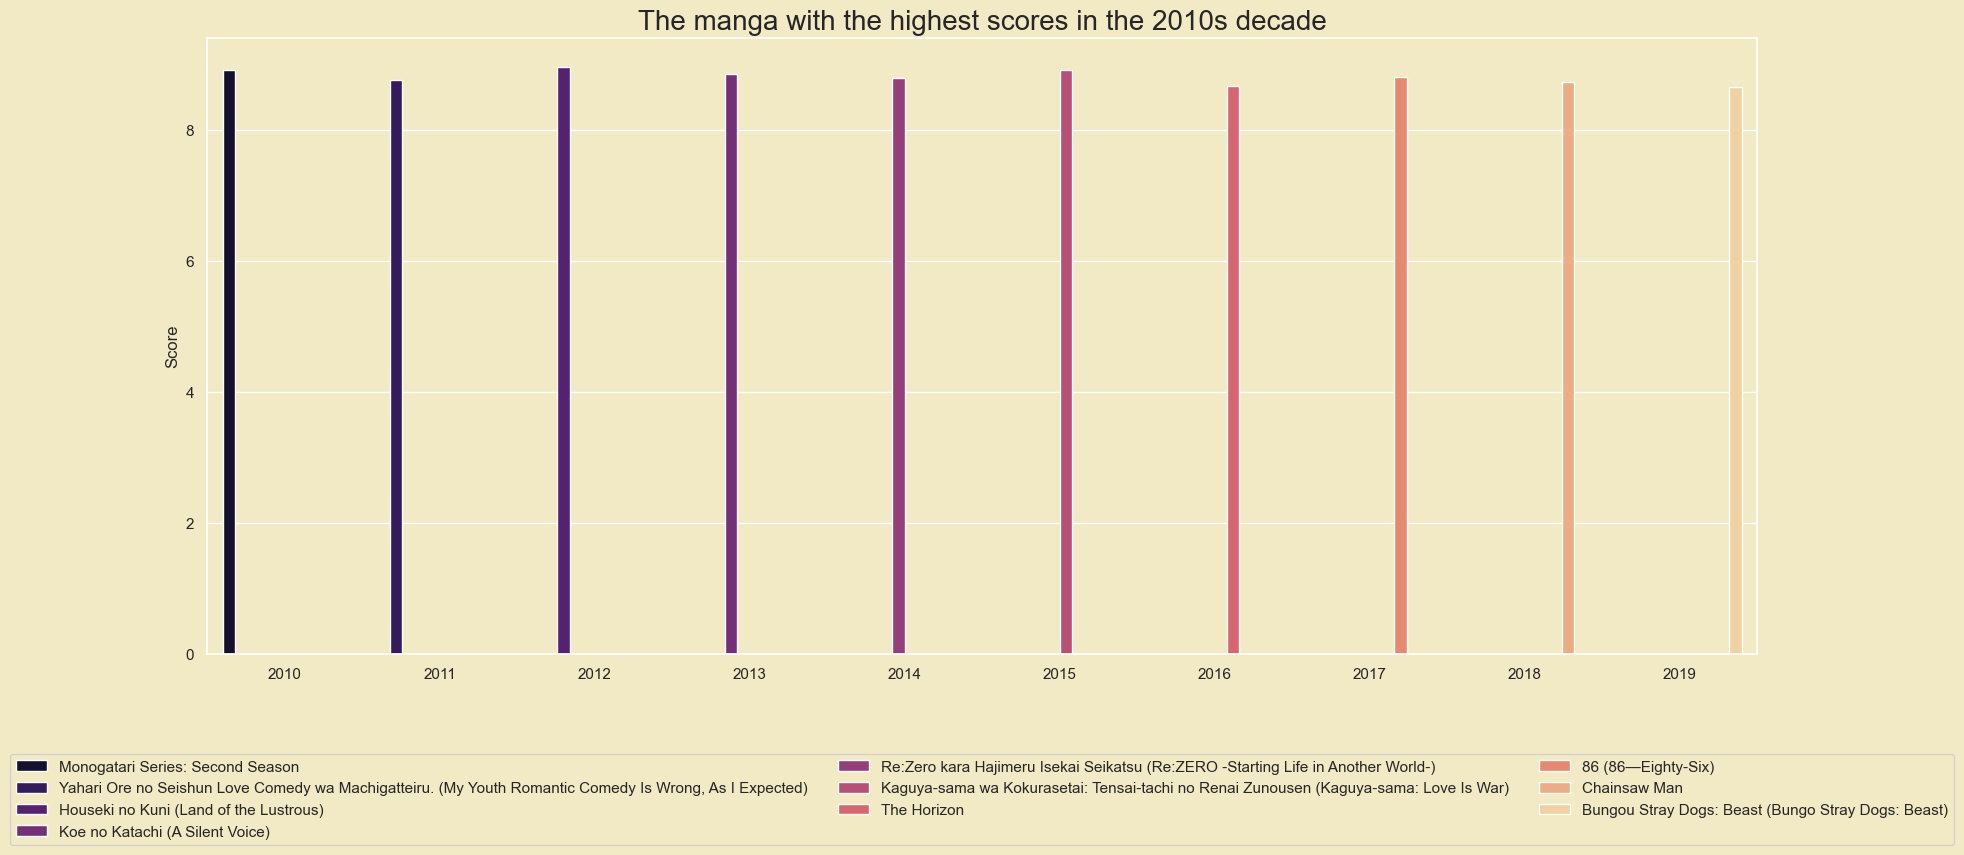

In [25]:
manga_2010s = manga_copy_df[(manga_copy_df['Release date'].dt.year >= 2010) & (manga_copy_df['Release date'].dt.year < 2020)]

max_score_per_year = manga_2010s.groupby(manga_2010s['Release date'].dt.year)['Score'].idxmax()
top_manga_by_year = manga_2010s.loc[max_score_per_year]


fig, axes = plt.subplots(1, 1, figsize=(20,8))
sns.barplot(x=top_manga_by_year['Release date'].dt.year, y=top_manga_by_year['Score'], palette="magma", hue=top_manga_by_year['Title'], ax=axes)
axes.set_title('The manga with the highest scores in the 2010s decade', fontsize=20)
axes.set_xlabel('')
axes.set_ylabel('Score')
plt.legend(title='',  bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)
plt.show()


### 📖 **COMMENTS:**
- And here are the manga series that received the highest scores during the golden age of manga.

- It's noticeable that the majority of these series have achieved scores close to 9 points.

<div style="text-align: left; background-color:#EDC0C7; font-family:Arial; color:black; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">END</div>